# The Hopfield Network: An Energy-Based Associative Memory

**Memory**: It stores a set of distinct patterns (or "memories").

**Associative**: It links a partial or noisy input (a stimulus) to the full, correct stored pattern.

**Auto-Associative**: The output (the retrieved memory) is one of the stored patterns itself, not a related pattern.

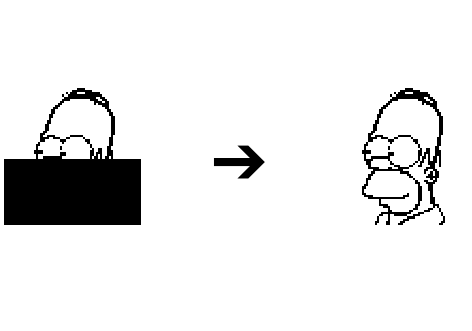

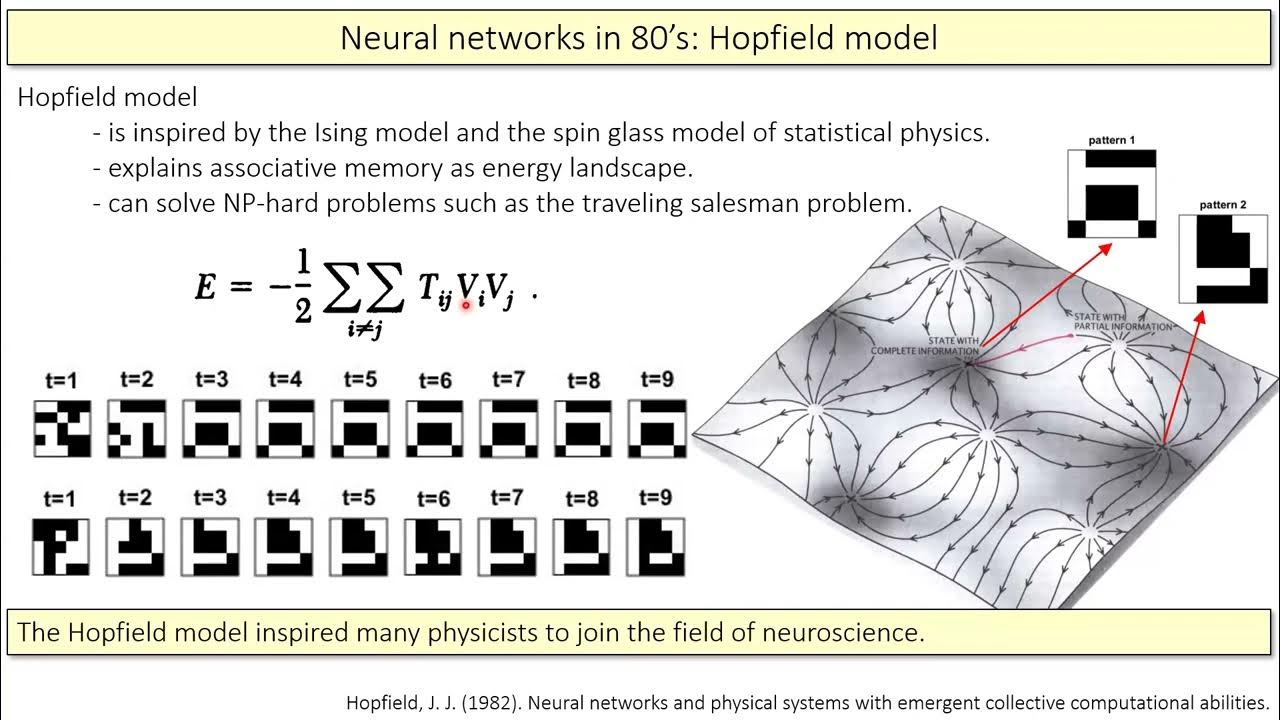

**Concept**:
- one of the earliest models of an **Artificial Recurrent Neural Network (RNN)**;
- developed by *John Hopfield* in **1982**;
- draws inspiration from concepts in **Statistical Physics** (the *spin-glass model*).

**Key Feature**: *Recurrence (Feedback)* = all neurons are connected to each other, forming a complete graph ( a **single layer** of neurons). The output of a neuron *i* becomes the input for all other neurons *j* in the network.

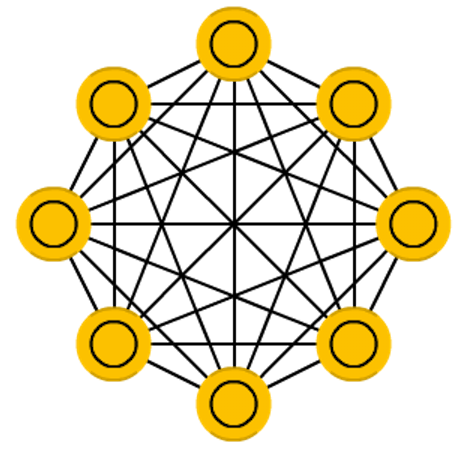



In [1]:

!rm -rf Hopfield_Networks
!git clone https://github.com/dirgnic/Hopfield_Networks.git

Cloning into 'Hopfield_Networks'...
remote: Enumerating objects: 847, done.
remote: Counting objects: 100% (847/847), done.
remote: Compressing objects: 100% (648/648), done.
remote: Total 847 (delta 191), reused 828 (delta 172), pack-reused 0 (from 0)
Receiving objects: 100% (847/847), 16.21 MiB | 1.58 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [4]:
import sys
import os

REPO_ROOT = '/content/Hopfield_Networks'

if REPO_ROOT not in sys.path:
    sys.path.append(REPO_ROOT)

print("Calea adăugată. Încearcă acum să rulezi celula de import.")

Calea adăugată. Încearcă acum să rulezi celula de import.


In [9]:
import os

# Set TARGET_DIR to the local project root instead of a Colab path
TARGET_DIR = '/Users/ingridcorobana/Desktop/An_III/final_projs/AMI_proj/hopfield_project'

os.chdir(TARGET_DIR)

print(f"Noul director de lucru (CWD): {os.getcwd()}")

Noul director de lucru (CWD): /Users/ingridcorobana/Desktop/An_III/final_projs/AMI_proj/hopfield_project


In [10]:
from src.hopfield import HopfieldNetwork

# Architecture and Neuron State


**Single Layer**: The network consists of a single layer of $N$ computational units (neurons).

**Fully Connected**: Every neuron is connected to every other neuron.

**No Self-Connections**: the weight $\mathbf{W}_{ii}$ is zero.

**Symmetric Weights**: The connections between neurons are symmetric, meaning the weight from neuron $i$ to neuron $j$ is the same as the weight from neuron $j$ to neuron $i$ ($\mathbf{W}_{ij} = \mathbf{W}_{ji}$). This symmetry is crucial for guaranteeing convergence.

**Neuron State**: In the classical model, the state of each neuron $i$ is **binary and polar**.$${\xi}_i \in \{-1, +1\}$$

The entire network state is a vector $\mathbf{{\xi}} = ({\xi}_1, {\xi}_2, \dots, {\xi}_N)$, which is the pattern currently being processed.

${\xi}_i = +1$ (active/white pixel)

${\xi}_i = -1$ (inactive/black pixel)

# Storage (The Learning/ **Hebbian** Rule)


 The storage phase involves setting the connection weights ($\mathbf{W}$) between the neurons based on the set of patterns ($\mathbf{ξ}^{(m)}$) we want the network to memorize.

**The Hebbian Principle**: ""Cells that fire together, wire together. When cell A and cell B are simultaneously active, the connection strength between them is increased." - Donald Hebb

$ $


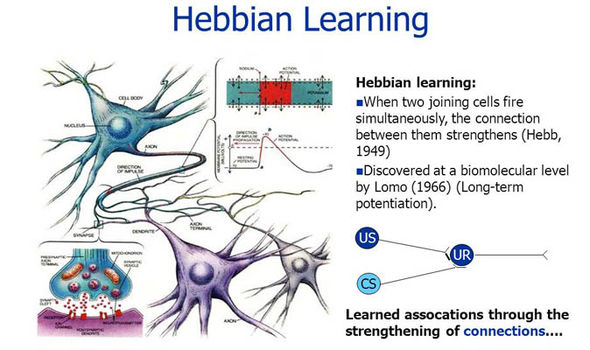



**Storing a Single Pattern ($M=1$)**

 $$\mathbf{W} = \boldsymbol{\xi}^{(1)} \left(\boldsymbol{\xi}^{(1)}\right)^T$$
$ $

 The weight connecting neuron $i$ to neuron $j$ ($\mathbf{W}_{ij}$) is calculated as the product of their respective states in the stored pattern:$$\mathbf{W}_{ij} = \xi_i^{(1)} \xi_j^{(1)}, \quad \text{for } i \neq j$$

$ $

**Interpretation**: If neurons $i$ and $j$ have the same state (+1, +1 or -1, -1), their weight $\mathbf{W}_{ij}$ will be strongly positive (excitatory).If they often have opposite states (+1, -1 or -1, +1), the weight will be strongly negative (inhibitory).

$ $

**Storing Multiple Patterns ($M>1$)**

$$\mathbf{W} = \sum_{m=1}^{M} \boldsymbol{\xi}^{(m)} \left(\boldsymbol{\xi}^{(m)}\right)^T$$
$ $


The weight $\mathbf{W}_{ij}$ is the sum of the products of the states $\xi_i$ and $\xi_j$ across all stored patterns:$$\mathbf{W}_{ij} = \sum_{m=1}^{M} \xi_i^{(m)} \xi_j^{(m)}, \quad \text{for } i \neq j$$
$ $

**Memory Overlap and Interference**

The magnitude of $\mathbf{W}_{ij}$ reflects how frequently neurons $i$ and $j$ fire together on average across all stored memories. When $M$ is **small** and the patterns $\boldsymbol{\xi}^{(m)}$ are **uncorrelated**, the individual patterns remain distinct minima in the energy landscape.

As $M$ **increases**, the sum creates cross-talk or **interference**. For example, a single connection $\mathbf{W}_{ij}$ might strongly support $\boldsymbol{\xi}^{(1)}$ but strongly oppose $\boldsymbol{\xi}^{(2)}$. The weight is the result of these conflicting demands. The system begins to generate **Spurious States** (new, stable minima that are linear combinations of the $\boldsymbol{\xi}^{(m)}$) due to this overlap.This interference is the direct mathematical reason for the limited storage capacity ($C \approx 0.14N$) in the classical Hopfield model.


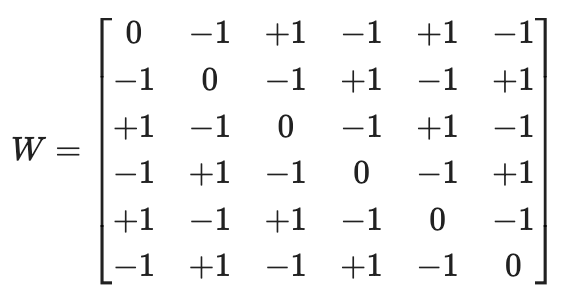

# Retrieval - Iterative Dynamics and the Update Rule


## Algorithm Principle:

**Initialization**: The network is initialized with an input vector $\mathbf{\xi}_{initial}$ (the partial/noisy stimulus).

**Iteration**: At each step, a neuron is selected, its activation is calculated, and its state is updated based on the result.

**Convergence**: The process stops when the network's state stabilizes, meaning it has settled into one of the stored patterns (a fixed point).

**Brain Analogy**:

*"You hear a few notes and recall the whole song".
The brain fills in missing information by settling into
a familiar, stable configuration.*

**The Activation and Update Rule**: The input $h_i$ to neuron $i$ is the weighted sum of the current states of all other neurons:$$h_i(t) = \sum_{j \neq i}^{N} \mathbf{W}_{ij} {\xi}_j(t)$$

The new state ${\xi}_i(t+1)$ of the neuron is determined by applying the Sign Function (or hard-limiting threshold) to its net input:$${\xi}_i(t+1) = \text{sgn}(h_i(t))$$
$ $

**Brain Analogy**:

*Each neuron "listens" to its inputs from other neurons:*
- Network dynamics: neurons update based on weighted input from neighbors
- Positive total input → neuron fires (s_i = +1)
- Negative total input → neuron stays silent (s_i = -1)
- Zero input → keep current state (or random choice)
        


$ $
##Types of Updates:
- Asynchronous (Most Common in Classical Models): Only one randomly selected neuron updates its state at a time. This method guarantees convergence because it ensures the Energy Function decreases monotonically.

- Synchronous: All neurons update their state simultaneously. This method is faster but can sometimes lead to the network entering a two-step cycle instead of a fixed point.

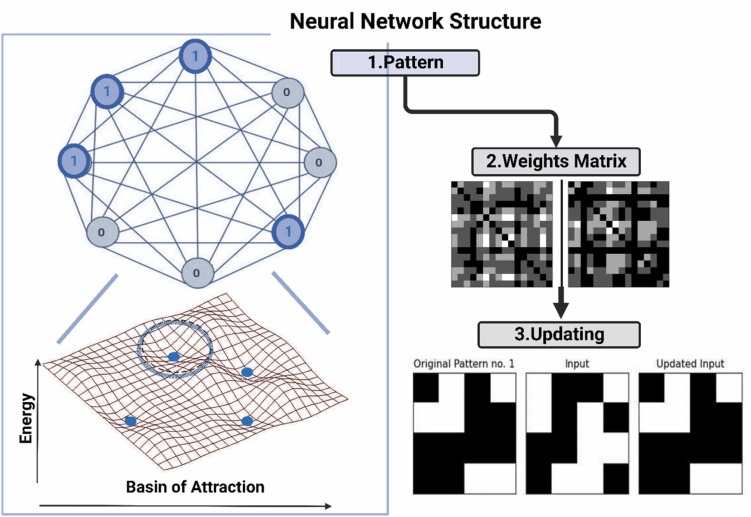



# The Energy Function (Lyapunov)
-  measures "consistency" of current state with stored patterns

$$E(\mathbf{{\xi}}) = -\frac{1}{2}\sum_{i=1}^{N} \sum_{j=1}^{N} \mathbf{W}_{ij} {\xi}_i {\xi}_j$$

## The Principle of Energy Minimization:

Due to symmetric weights and asynchronous updates, the value of $E(\mathbf{{\xi}})$ never increases. Stored patterns correspond to local minima (valleys) in the energy landscape. The network constantly performs a gradient descent, rolling down the energy surface towards the nearest minimum.



*Like potential energy in physics* : lower energy = more stable state.

**Analogy**: Imagine a rough landscape with many valleys. Each stored memory is the bottom of a valley (a local minimum). When you drop a ball (the noisy input) onto the landscape, it rolls down until it settles in the nearest valley bottom (the retrieved memory).




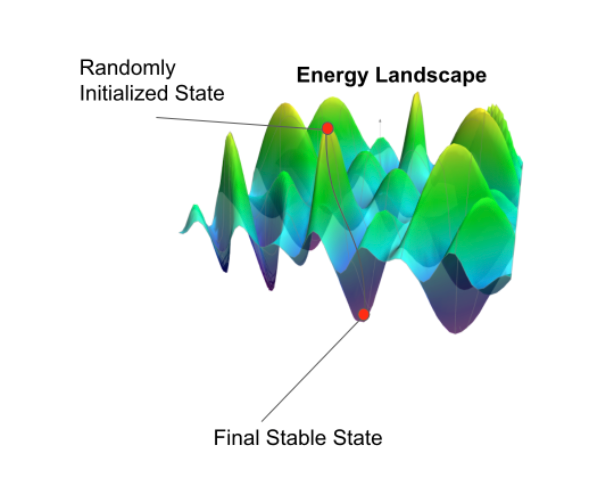

In [11]:

#Hopfield Network Implementation


import numpy as np
from typing import List, Tuple, Optional


class HopfieldNetwork:
    """
    Biological Analogy:
    -------------------
    - Each neuron can fire (s_i = +1) or stay silent (s_i = -1)
    - Synaptic weights w_ij encode how strongly neurons influence each other
    - Hebbian learning: "neurons that fire together, wire together"
    - Network dynamics: neurons update based on weighted input from neighbors
    - Energy function: measures "consistency" of current state with stored patterns
    """

    def __init__(self, n_neurons: int):
        """
        Initialize the Hopfield network.

        n_neurons : (e.g., 100 for 10x10 images)
        """
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))
        self.patterns = None


    def train(self, patterns: np.ndarray):
        """
        Train the network using Hebbian learning rule.

        Parameters:
        -----------
        patterns : np.ndarray
            Array of shape (n_patterns, n_neurons) with values in {-1, +1}
        """
        patterns = np.atleast_2d(patterns)
        self.patterns = patterns
        n_patterns = patterns.shape[0]

        # Hebbian learning: accumulate outer products
        self.weights = np.zeros((self.n_neurons, self.n_neurons))
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)

        # Normalize by number of neurons
        self.weights /= self.n_neurons

        # Zero diagonal (no self-connections)
        np.fill_diagonal(self.weights, 0)

    def energy(self, state: np.ndarray) -> float:
        """
        Compute the energy of a given state.

        Parameters:
        -----------
        state : np.ndarray
            Current state vector of shape (n_neurons,) with values in {-1, +1}

        Returns:
        --------
        energy : float
            Energy value (more negative = more stable)
        """
        return -0.5 * np.dot(state, np.dot(self.weights, state))

    def update_async(self, state: np.ndarray, indices: Optional[List[int]] = None) -> np.ndarray:
        """
        Perform asynchronous update (one neuron at a time).

        - Zero input → keep current state (or random choice)

        Parameters:
        -----------
        state : np.ndarray
            Current state vector
        indices : List[int], optional
            Specific neurons to update. If None, update random neuron.

        Returns:
        --------
        new_state : np.ndarray
            Updated state vector
        """
        new_state = state.copy()

        if indices is None:
            # Update one random neuron
            indices = [np.random.randint(0, self.n_neurons)]

        for i in indices:
            # Compute weighted input (like synaptic input to neuron i)
            h_i = np.dot(self.weights[i], state)

            # Update neuron based on sign of input
            new_state[i] = 1 if h_i > 0 else -1 if h_i < 0 else state[i]

        return new_state

    def update_sync(self, state: np.ndarray) -> np.ndarray:
        """
        Perform synchronous update (all neurons at once).

        Warning: Synchronous updates can lead to oscillations.
        Asynchronous updates guarantee energy decrease.

        Parameters:
        -----------
        state : np.ndarray
            Current state vector

        Returns:
        --------
        new_state : np.ndarray
            Updated state vector
        """
        # Compute input to all neurons
        h = np.dot(self.weights, state)

        # Update all neurons simultaneously
        new_state = np.sign(h)
        new_state[h == 0] = state[h == 0]  # Keep state if input is zero

        return new_state

    def retrieve(self,
                 initial_state: np.ndarray,
                 max_iter: int = 100,
                 mode: str = 'async',
                 record_trajectory: bool = False) -> Tuple[np.ndarray, dict]:
        """
        Retrieve a stored pattern from a noisy/partial input.

        Parameters:
        -----------
        initial_state : np.ndarray
            Starting state (noisy pattern)
        max_iter : int
            Maximum number of update iterations
        mode : str
            'async' for asynchronous (safer), 'sync' for synchronous
        record_trajectory : bool
            If True, record energy and states during retrieval

        Returns:
        --------
        final_state : np.ndarray
            Retrieved pattern (converged state)
        info : dict
            Dictionary with convergence information:
            - 'converged': bool
            - 'iterations': int
            - 'energy_trajectory': list (if record_trajectory=True)
            - 'state_trajectory': list (if record_trajectory=True)
        """
        state = initial_state.copy()
        info = {
            'converged': False,
            'iterations': 0,
            'energy_trajectory': [],
            'state_trajectory': []
        }

        if record_trajectory:
            info['energy_trajectory'].append(self.energy(state))
            info['state_trajectory'].append(state.copy())

        for iteration in range(max_iter):
            # Update neurons
            if mode == 'async':
                # Update all neurons sequentially in random order
                new_state = state.copy()
                indices = np.random.permutation(self.n_neurons)
                for i in indices:
                    h_i = np.dot(self.weights[i], new_state)
                    new_state[i] = 1 if h_i > 0 else -1 if h_i < 0 else new_state[i]
            else:
                new_state = self.update_sync(state)

            if record_trajectory:
                info['energy_trajectory'].append(self.energy(new_state))
                info['state_trajectory'].append(new_state.copy())

            # Check convergence
            if np.array_equal(new_state, state):
                info['converged'] = True
                info['iterations'] = iteration + 1
                break

            state = new_state
            info['iterations'] = iteration + 1

        return state, info

    def add_noise(self, pattern: np.ndarray, noise_level: float = 0.2) -> np.ndarray:
        """
        Add random noise to a pattern by flipping bits.

        Parameters:
        -----------
        pattern : np.ndarray
            Original pattern
        noise_level : float
            Fraction of bits to flip (0.0 to 1.0)

        Returns:
        --------
        noisy_pattern : np.ndarray
            Pattern with noise added
        """
        noisy = pattern.copy()
        n_flips = int(self.n_neurons * noise_level)
        flip_indices = np.random.choice(self.n_neurons, n_flips, replace=False)
        noisy[flip_indices] *= -1
        return noisy

    def compute_overlap(self, state1: np.ndarray, state2: np.ndarray) -> float:
        """
        Compute normalized overlap between two states.

        Returns 1.0 if identical, -1.0 if opposite, 0.0 if orthogonal.

        Parameters:
        -----------
        state1, state2 : np.ndarray
            State vectors to compare

        Returns:
        --------
        overlap : float
            Normalized dot product in range [-1, 1]
        """
        return np.dot(state1, state2) / self.n_neurons

    def hamming_distance(self, state1: np.ndarray, state2: np.ndarray) -> int:
        """
        Compute Hamming distance (number of differing bits).

        Parameters:
        -----------
        state1, state2 : np.ndarray
            State vectors to compare

        Returns:
        --------
        distance : int
            Number of positions where states differ
        """
        return np.sum(state1 != state2)

    def check_spurious_attractors(self, n_tests: int = 100) -> List[np.ndarray]:
        """
        Search for spurious attractors (stable states that aren't stored patterns).

        Spurious attractors emerge when too many patterns are stored,
        creating "hybrid memories" or unexpected stable states.

        Brain Analogy:
        --------------
        Like false memories or confabulation - the brain settles into
        a stable but incorrect memory that's a mix of real experiences.

        Parameters:
        -----------
        n_tests : int
            Number of random initializations to test

        Returns:
        --------
        spurious : List[np.ndarray]
            List of detected spurious attractors
        """
        spurious = []

        for _ in range(n_tests):
            # Random initialization
            random_state = np.random.choice([-1, 1], size=self.n_neurons)

            # Let network converge
            final_state, _ = self.retrieve(random_state, max_iter=50)

            # Check if this matches any stored pattern
            is_stored = False
            for pattern in self.patterns:
                if np.array_equal(final_state, pattern):
                    is_stored = True
                    break

            # If not a stored pattern and not already found, it's spurious
            if not is_stored:
                is_new = True
                for sp in spurious:
                    if np.array_equal(final_state, sp):
                        is_new = False
                        break
                if is_new:
                    spurious.append(final_state)

        return spurious

In [17]:
# Setup
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
#from src.hopfield import HopfieldNetwork

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
plt.rcParams['figure.figsize'] = (14, 8)
%matplotlib inline

print("Setup complete!")

Setup complete!


# Hopfield Networks: From Classic to Modern

## Image Retrieval and Associative Memory

This notebook demonstrates Hopfield networks as content-addressable memory systems, progressing from the classic 1982 formulation to modern improvements.

**Structure:**
1. **Introduction**: Hopfield fundamentals - energy landscape, weight matrix, Hebbian learning
2. **Part 1**: Geometric patterns (distinct, orthogonal → works well)
3. **Part 2**: Simpsons characters (similar patterns → Hebbian fails, Pseudo-Inverse succeeds)

**Reference:** Hopfield, J. J. (1982). "Neural networks and physical systems with emergent collective computational abilities". PNAS, 79(8), 2554-2558.

---

*Authors: Ingrid Corobana, Cosmin Glod, Irina Moise*  
*Project: Archaeology of Intelligent Machines - 2025*

In [12]:
# Setup and Imports
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from src.hopfield import HopfieldNetwork

# Reproducibility
np.random.seed(42)

# Display settings
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

print("Setup complete - Libraries imported")

Setup complete - Libraries imported


---
# Introduction: How Hopfield Networks Store Memories

## The Core Idea

A Hopfield network stores patterns as **stable attractors** in an energy landscape. Memory recall works like a ball rolling downhill - the network "falls" into the nearest stored pattern.

**Key Concepts:**
- **Neurons**: Binary units (+1 = firing, -1 = silent)
- **Hebbian Learning**: "Neurons that fire together, wire together"
- **Energy Minimization**: Network dynamics always decrease energy
- **Associative Memory**: Partial input retrieves complete pattern

Let's visualize how patterns are stored and how the weight matrix encodes memories.

Generated 3 letter patterns
Each pattern: 100 neurons (10x10 grid)
Binary values: [-1  1] (firing=+1, silent=-1)


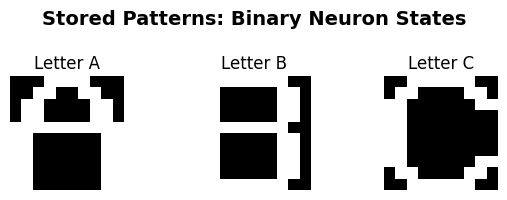


Pattern Similarity Matrix (normalized overlap):
     A      B      C
A  [1.   0.36 0.2 ]
B  [0.36 1.   0.52]
C  [0.2  0.52 1.  ]

Interpretation: 1.0=identical, 0.0=orthogonal, -1.0=opposite


In [16]:
# Generate letter patterns A, B, C (from exploration.ipynb)
from src.patterns import generate_letters, compute_pattern_similarity_matrix
from src.visualization import plot_multiple_patterns, plot_energy_trajectory

# Generate letters
patterns_abc = generate_letters(['A', 'B', 'C'], size=10)
print(f"Generated {len(patterns_abc)} letter patterns")
print(f"Each pattern: {patterns_abc.shape[1]} neurons (10x10 grid)")
print(f"Binary values: {np.unique(patterns_abc)} (firing=+1, silent=-1)")

# Visualize stored patterns
fig = plot_multiple_patterns(patterns_abc, (10, 10),
                            titles=['Letter A', 'Letter B', 'Letter C'],
                            n_cols=3)
plt.suptitle('Stored Patterns: Binary Neuron States', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Pattern similarity analysis
similarity = compute_pattern_similarity_matrix(patterns_abc)
print("\nPattern Similarity Matrix (normalized overlap):")
print("     A      B      C")
for i, letter in enumerate(['A', 'B', 'C']):
    print(f"{letter}  {similarity[i]}")
print("\nInterpretation: 1.0=identical, 0.0=orthogonal, -1.0=opposite")

### The Weight Matrix: How Memories Are Encoded

The **weight matrix** $\mathbf{W}$ is the "brain" of the Hopfield network. It stores all patterns using **Hebbian learning**:

$$\mathbf{W} = \frac{1}{N} \sum_{\mu=1}^{P} \boldsymbol{\xi}^{\mu} (\boldsymbol{\xi}^{\mu})^T$$

Where:
- $N$ = number of neurons (100 for a 10×10 image)
- $P$ = number of stored patterns (3 letters: A, B, C)
- $\boldsymbol{\xi}^{\mu}$ = pattern $\mu$ as a vector of $\{-1, +1\}$ values
- $(\boldsymbol{\xi}^{\mu})^T$ = transpose (column vector)

**What does this mean?**

Each pattern contributes an **outer product** $\boldsymbol{\xi}^{\mu} (\boldsymbol{\xi}^{\mu})^T$:

$$\text{Contribution of pattern A} = \begin{pmatrix} \xi_1 \\ \xi_2 \\ \vdots \\ \xi_N \end{pmatrix} \begin{pmatrix} \xi_1 & \xi_2 & \cdots & \xi_N \end{pmatrix} = \begin{pmatrix} \xi_1\xi_1 & \xi_1\xi_2 & \cdots \\ \xi_2\xi_1 & \xi_2\xi_2 & \cdots \\ \vdots & & \ddots \end{pmatrix}$$

**Interpreting the weight $w_{ij}$:**

| Neuron $i$ | Neuron $j$ | Product $\xi_i \cdot \xi_j$ | Weight Contribution |
|------------|------------|------------------------------|---------------------|
| +1 (on)    | +1 (on)    | +1                           | **Positive** (strengthen connection) |
| -1 (off)   | -1 (off)   | +1                           | **Positive** (strengthen connection) |
| +1 (on)    | -1 (off)   | -1                           | **Negative** (weaken connection) |
| -1 (off)   | +1 (on)    | -1                           | **Negative** (weaken connection) |

This is **Hebb's Rule**: *"Neurons that fire together, wire together."*

**The Three Plots Below Show:**
1. **Weight Matrix W**: The full 100×100 matrix encoding all 3 patterns
2. **Weight Distribution**: Histogram showing most weights cluster around ±0.01-0.03
3. **Letter A's Contribution**: The outer product $\boldsymbol{\xi}^A (\boldsymbol{\xi}^A)^T$ showing how one pattern contributes

Network trained with Hebbian learning!
Weight matrix shape: (100, 100)
Average synaptic strength: 0.0169


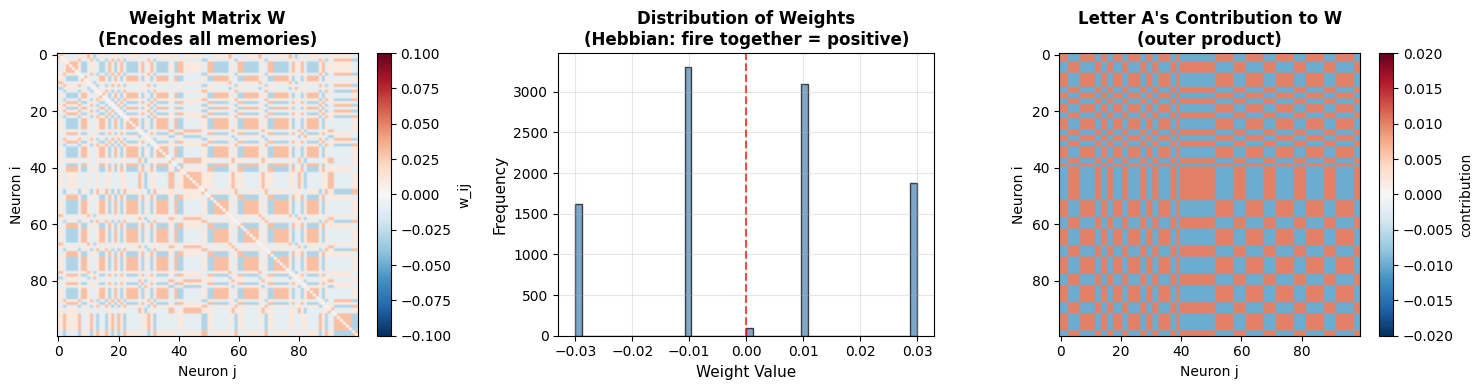


Hebbian Rule: W = (1/N) * sum(pattern @ pattern.T)
Each stored pattern contributes an outer product to the weight matrix.


In [15]:
# Train network and visualize weight matrix
intro_net = HopfieldNetwork(n_neurons=100)
intro_net.train(patterns_abc)

print("Network trained with Hebbian learning!")
print(f"Weight matrix shape: {intro_net.weights.shape}")
print(f"Average synaptic strength: {np.mean(np.abs(intro_net.weights)):.4f}")

# Visualize weight matrix structure
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Full weight matrix
im1 = axes[0].imshow(intro_net.weights, cmap='RdBu_r', aspect='auto', vmin=-0.1, vmax=0.1)
axes[0].set_title('Weight Matrix W\n(Encodes all memories)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Neuron j')
axes[0].set_ylabel('Neuron i')
plt.colorbar(im1, ax=axes[0], label='w_ij')

# 2. Weight histogram
axes[1].hist(intro_net.weights.flatten(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_xlabel('Weight Value', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Weights\n(Hebbian: fire together = positive)', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1].grid(True, alpha=0.3)

# 3. Show contribution from each pattern
# W = (1/N) * sum(xi * xi^T)
pattern_contributions = []
for i, p in enumerate(patterns_abc):
    contribution = np.outer(p, p) / 100
    pattern_contributions.append(contribution)

# Show pattern A's contribution
im3 = axes[2].imshow(pattern_contributions[0], cmap='RdBu_r', aspect='auto', vmin=-0.02, vmax=0.02)
axes[2].set_title("Letter A's Contribution to W\n(outer product)", fontsize=12, fontweight='bold')
axes[2].set_xlabel('Neuron j')
axes[2].set_ylabel('Neuron i')
plt.colorbar(im3, ax=axes[2], label='contribution')

plt.tight_layout()
plt.show()

print("\nHebbian Rule: W = (1/N) * sum(pattern @ pattern.T)")
print("Each stored pattern contributes an outer product to the weight matrix.")

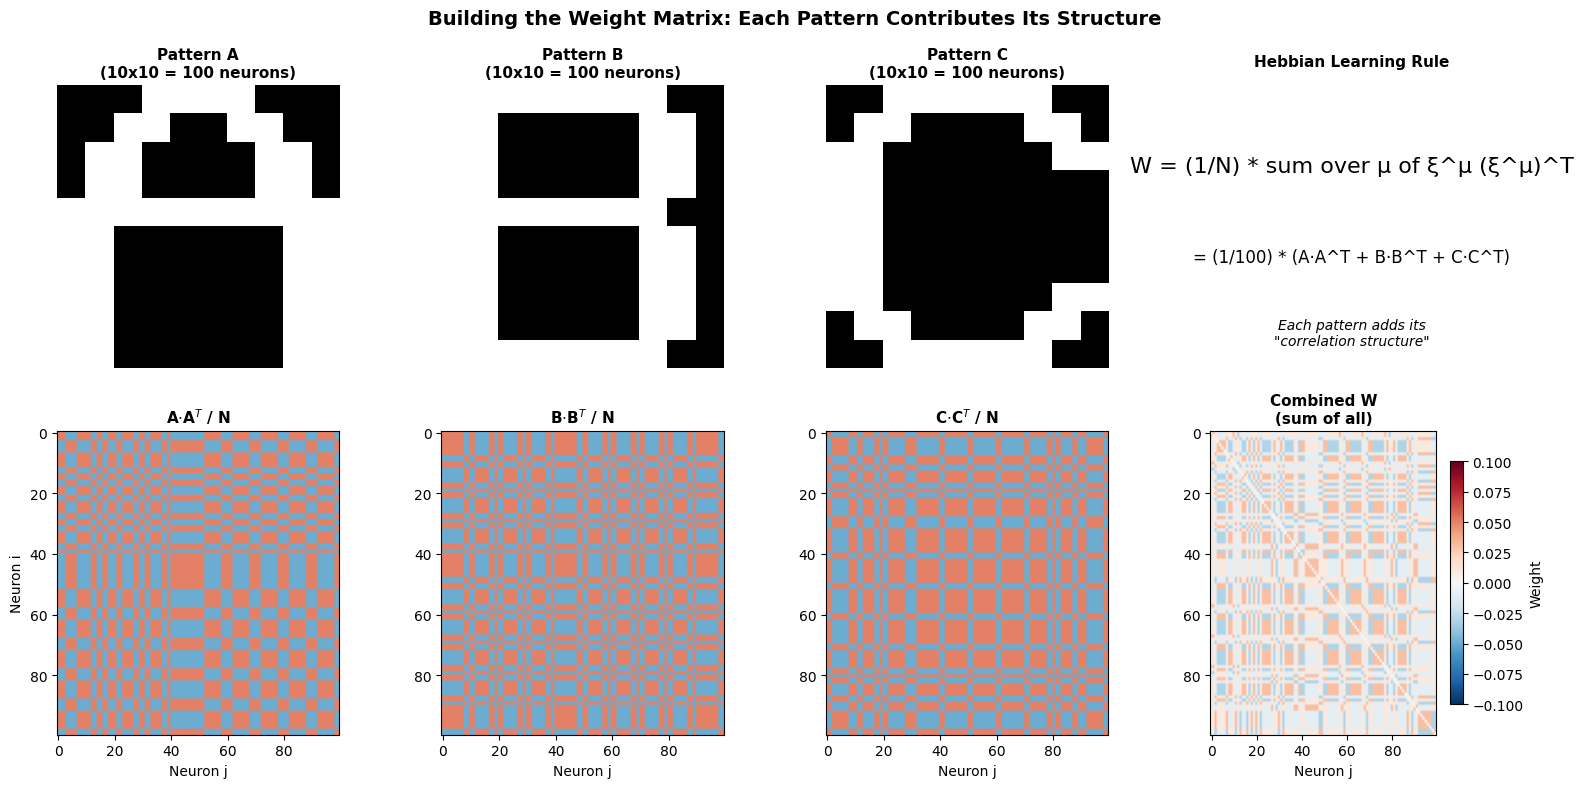

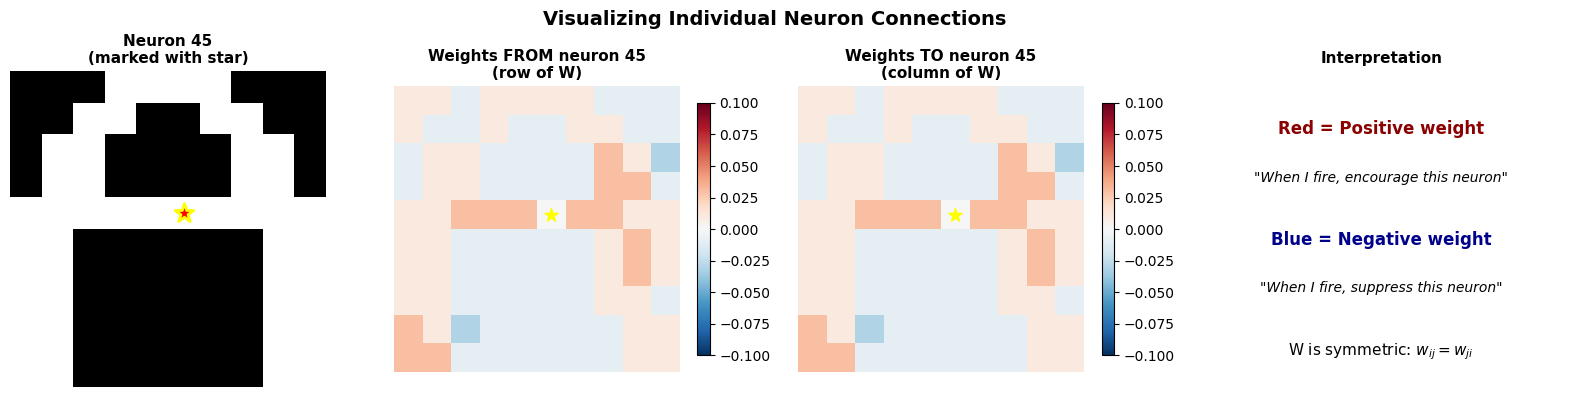


Key insight: The weight matrix encodes which neurons should fire TOGETHER
Positive weights = co-activate, Negative weights = mutually inhibit


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure required patterns and network are available
try:
    patterns_abc
except NameError:
    from src.patterns import generate_letters
    patterns_abc = generate_letters(['A', 'B', 'C'], size=10)

try:
    intro_net
except NameError:
    from src.hopfield import HopfieldNetwork
    intro_net = HopfieldNetwork(n_neurons=patterns_abc.shape[1])
    intro_net.train(patterns_abc)

# Additional visualizations: How patterns combine in the weight matrix

fig = plt.figure(figsize=(16, 8))

# Row 1: Show each pattern and its outer product contribution
for i, (pattern, letter) in enumerate(zip(patterns_abc, ['A', 'B', 'C'])):
    # Pattern image
    ax1 = fig.add_subplot(2, 4, i+1)
    ax1.imshow(pattern.reshape(10, 10), cmap='gray', vmin=-1, vmax=1)
    ax1.set_title(f'Pattern {letter}\n(10x10 = 100 neurons)', fontsize=11, fontweight='bold')
    ax1.axis('off')

# Show the mathematical operation
ax_eq = fig.add_subplot(2, 4, 4)
ax_eq.text(0.5, 0.7, 'W = (1/N) * sum over μ of ξ^μ (ξ^μ)^T',
           fontsize=16, ha='center', va='center', transform=ax_eq.transAxes)
ax_eq.text(0.5, 0.4, '= (1/100) * (A·A^T + B·B^T + C·C^T)',
           fontsize=12, ha='center', va='center', transform=ax_eq.transAxes)
ax_eq.text(0.5, 0.15, 'Each pattern adds its\n"correlation structure"',
           fontsize=10, ha='center', va='center', transform=ax_eq.transAxes, style='italic')
ax_eq.axis('off')
ax_eq.set_title('Hebbian Learning Rule', fontsize=11, fontweight='bold')

# Row 2: Outer products for each pattern
for i, (pattern, letter) in enumerate(zip(patterns_abc, ['A', 'B', 'C'])):
    ax2 = fig.add_subplot(2, 4, i+5)
    outer = np.outer(pattern, pattern) / 100
    im = ax2.imshow(outer, cmap='RdBu_r', vmin=-0.02, vmax=0.02, aspect='auto')
    ax2.set_title(f'{letter}$\\cdot${letter}$^T$ / N', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Neuron j')
    if i == 0:
        ax2.set_ylabel('Neuron i')

# Final combined weight matrix
ax_final = fig.add_subplot(2, 4, 8)
im_final = ax_final.imshow(intro_net.weights, cmap='RdBu_r', vmin=-0.1, vmax=0.1, aspect='auto')
ax_final.set_title('Combined W\n(sum of all)', fontsize=11, fontweight='bold')
ax_final.set_xlabel('Neuron j')
plt.colorbar(im_final, ax=ax_final, label='Weight', shrink=0.8)

plt.suptitle('Building the Weight Matrix: Each Pattern Contributes Its Structure', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization 2: What the weights "see" - connection strength between specific pixels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Pick a specific neuron (center of letter A's peak)
target_neuron = 45  # Middle of the grid

# Show which neuron we're looking at
pattern_with_marker = patterns_abc[0].reshape(10, 10).copy().astype(float)
row, col = target_neuron // 10, target_neuron % 10
axes[0].imshow(pattern_with_marker, cmap='gray', vmin=-1, vmax=1)
axes[0].scatter([col], [row], c='red', s=200, marker='*', edgecolors='yellow', linewidths=2)
axes[0].set_title(f'Neuron {target_neuron}\n(marked with star)', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Show weights FROM this neuron to all others
weights_from_neuron = intro_net.weights[target_neuron, :].reshape(10, 10)
im1 = axes[1].imshow(weights_from_neuron, cmap='RdBu_r', vmin=-0.1, vmax=0.1)
axes[1].scatter([col], [row], c='yellow', s=100, marker='*')
axes[1].set_title(f'Weights FROM neuron {target_neuron}\n(row of W)', fontsize=11, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im1, ax=axes[1], shrink=0.8)

# Show weights TO this neuron from all others
weights_to_neuron = intro_net.weights[:, target_neuron].reshape(10, 10)
im2 = axes[2].imshow(weights_to_neuron, cmap='RdBu_r', vmin=-0.1, vmax=0.1)
axes[2].scatter([col], [row], c='yellow', s=100, marker='*')
axes[2].set_title(f'Weights TO neuron {target_neuron}\n(column of W)', fontsize=11, fontweight='bold')
axes[2].axis('off')
plt.colorbar(im2, ax=axes[2], shrink=0.8)

# Interpretation
axes[3].text(0.5, 0.8, 'Red = Positive weight', fontsize=12, ha='center', color='darkred', fontweight='bold', transform=axes[3].transAxes)
axes[3].text(0.5, 0.65, '"When I fire, encourage this neuron"', fontsize=10, ha='center', style='italic', transform=axes[3].transAxes)
axes[3].text(0.5, 0.45, 'Blue = Negative weight', fontsize=12, ha='center', color='darkblue', fontweight='bold', transform=axes[3].transAxes)
axes[3].text(0.5, 0.3, '"When I fire, suppress this neuron"', fontsize=10, ha='center', style='italic', transform=axes[3].transAxes)
axes[3].text(0.5, 0.1, 'W is symmetric: $w_{ij} = w_{ji}$', fontsize=11, ha='center', transform=axes[3].transAxes)
axes[3].axis('off')
axes[3].set_title('Interpretation', fontsize=11, fontweight='bold')

plt.suptitle('Visualizing Individual Neuron Connections', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey insight: The weight matrix encodes which neurons should fire TOGETHER")
print("Positive weights = co-activate, Negative weights = mutually inhibit")

Testing Letter A with 25% noise
Bits flipped: 25/100
Converged in: 2 iterations
Final errors: 0
Retrieval: SUCCESS


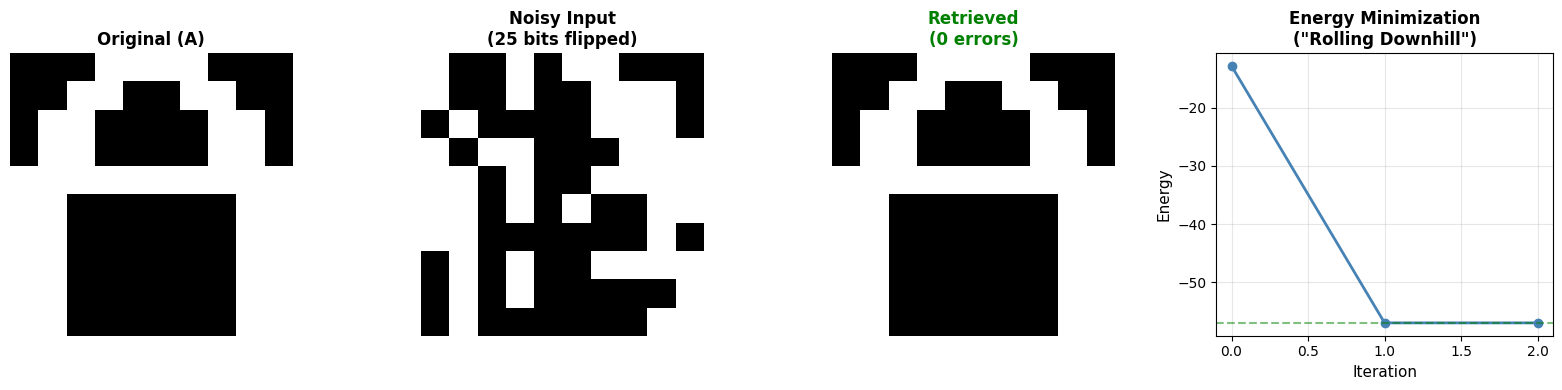


Key Insight: Energy ALWAYS decreases - the network 'rolls downhill'
into the nearest energy valley (stored memory).


In [19]:
# Test memory retrieval with noise and show energy trajectory
original = patterns_abc[0]  # Letter A
noise_level = 0.25

# Add noise
noisy = intro_net.add_noise(original, noise_level=noise_level)
hamming_before = intro_net.hamming_distance(noisy, original)

# Retrieve with trajectory recording
retrieved, info = intro_net.retrieve(noisy, max_iter=50, record_trajectory=True)
hamming_after = intro_net.hamming_distance(retrieved, original)
success = np.array_equal(retrieved, original)

print(f"Testing Letter A with {int(noise_level*100)}% noise")
print(f"Bits flipped: {hamming_before}/100")
print(f"Converged in: {info['iterations']} iterations")
print(f"Final errors: {hamming_after}")
print(f"Retrieval: {'SUCCESS' if success else 'FAILED'}")

# Visualization: Pattern + Energy Landscape
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original
axes[0].imshow(original.reshape(10, 10), cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
axes[0].set_title('Original (A)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Noisy input
axes[1].imshow(noisy.reshape(10, 10), cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
axes[1].set_title(f'Noisy Input\n({hamming_before} bits flipped)', fontsize=12, fontweight='bold')
axes[1].axis('off')

# Retrieved
color = 'green' if success else 'red'
axes[2].imshow(retrieved.reshape(10, 10), cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
axes[2].set_title(f'Retrieved\n({hamming_after} errors)', fontsize=12, fontweight='bold', color=color)
axes[2].axis('off')

# Energy trajectory
energies = info['energy_trajectory']
axes[3].plot(range(len(energies)), energies, 'o-', linewidth=2, markersize=6, color='steelblue')
axes[3].set_xlabel('Iteration', fontsize=11)
axes[3].set_ylabel('Energy', fontsize=11)
axes[3].set_title('Energy Minimization\n("Rolling Downhill")', fontsize=12, fontweight='bold')
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=energies[-1], color='green', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nKey Insight: Energy ALWAYS decreases - the network 'rolls downhill'")
print("into the nearest energy valley (stored memory).")

### 3D Energy Landscape Visualization

The energy function creates a landscape where stored patterns sit at the bottom of "valleys" (local minima). When we present a noisy pattern, the network "rolls downhill" to the nearest valley.

Since our actual state space is 100-dimensional, we project it onto 2D for visualization using PCA.

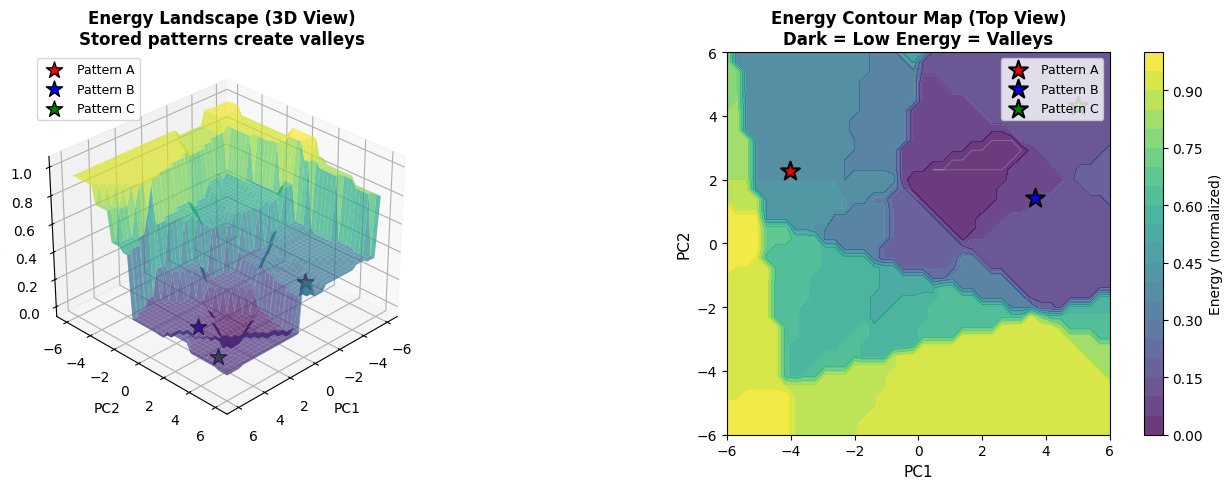


Interpretation:
- Dark regions = low energy valleys = stable states (stored memories)
- Stars mark the stored patterns (A, B, C) at energy minima
- Any noisy input 'rolls downhill' to the nearest valley


In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Create 3D energy landscape visualization
def compute_energy(state, weights):
    """Compute Hopfield energy for a state."""
    return -0.5 * np.dot(state, np.dot(weights, state))

# Use PCA to find 2D projection of pattern space
all_states = np.vstack([patterns_abc,
                        intro_net.add_noise(patterns_abc[0], 0.3).reshape(1,-1),
                        intro_net.add_noise(patterns_abc[1], 0.3).reshape(1,-1)])
pca = PCA(n_components=2)
pca.fit(all_states)

# Create a grid in 2D PCA space
grid_size = 40
x_range = np.linspace(-6, 6, grid_size)
y_range = np.linspace(-6, 6, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute energy at each grid point by reconstructing approximate states
Z = np.zeros_like(X)
for i in range(grid_size):
    for j in range(grid_size):
        # Approximate reconstruction (simplified)
        pca_coords = np.array([X[i, j], Y[i, j]])
        approx_state = pca.inverse_transform(pca_coords.reshape(1, -1)).flatten()
        approx_state = np.sign(approx_state)  # Binarize
        Z[i, j] = compute_energy(approx_state, intro_net.weights)

# Normalize for better visualization
Z = (Z - Z.min()) / (Z.max() - Z.min() + 1e-10)

# Project stored patterns to 2D
pattern_coords_2d = pca.transform(patterns_abc)

# Create 3D surface plot
fig = plt.figure(figsize=(14, 5))

# 3D Surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
ax1.set_xlabel('PC1', fontsize=10)
ax1.set_ylabel('PC2', fontsize=10)
ax1.set_zlabel('Energy', fontsize=10)
ax1.set_title('Energy Landscape (3D View)\nStored patterns create valleys', fontsize=12, fontweight='bold')
ax1.view_init(elev=30, azim=45)

# Mark stored patterns
for idx, (coord, label) in enumerate(zip(pattern_coords_2d, ['A', 'B', 'C'])):
    approx_state = np.sign(pca.inverse_transform(coord.reshape(1, -1)).flatten())
    energy = compute_energy(approx_state, intro_net.weights)
    energy_norm = (energy - Z.min()*((Z.max()-Z.min())+1e-10)) / (Z.max()*((Z.max()-Z.min())+1e-10) - Z.min()*((Z.max()-Z.min())+1e-10) + 1e-10)
    ax1.scatter([coord[0]], [coord[1]], [0.1], s=150, marker='*', c=['red', 'blue', 'green'][idx],
                edgecolor='black', linewidth=1, zorder=5, label=f'Pattern {label}')

ax1.legend(loc='upper left', fontsize=9)

# 2D Contour
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.8)
ax2.contour(X, Y, Z, levels=10, colors='white', alpha=0.3, linewidths=0.5)
plt.colorbar(contour, ax=ax2, label='Energy (normalized)')

# Mark stored patterns
for idx, (coord, label) in enumerate(zip(pattern_coords_2d, ['A', 'B', 'C'])):
    ax2.scatter(coord[0], coord[1], s=200, marker='*', c=['red', 'blue', 'green'][idx],
                edgecolor='black', linewidth=1.5, label=f'Pattern {label}', zorder=5)

ax2.set_xlabel('PC1', fontsize=11)
ax2.set_ylabel('PC2', fontsize=11)
ax2.set_title('Energy Contour Map (Top View)\nDark = Low Energy = Valleys', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Dark regions = low energy valleys = stable states (stored memories)")
print("- Stars mark the stored patterns (A, B, C) at energy minima")
print("- Any noisy input 'rolls downhill' to the nearest valley")

---
# Part 1: Geometric Pattern Recognition

Now we scale up to larger patterns (24x24 = 576 neurons) and test with 5 distinct geometric shapes. These patterns are highly orthogonal (low correlation), which is ideal for Classical Hopfield networks.

In [21]:
def create_geometric_patterns(size=24):
    """Create 5 distinct geometric patterns."""
    patterns = []
    names = []

    # 1. Vertical bars (thick)
    p = -np.ones((size, size))
    p[:, 4:7] = 1
    p[:, 17:20] = 1
    patterns.append(p)
    names.append('Vertical')

    # 2. Horizontal bars (thick)
    p = -np.ones((size, size))
    p[4:7, :] = 1
    p[17:20, :] = 1
    patterns.append(p)
    names.append('Horizontal')

    # 3. Cross (thick)
    p = -np.ones((size, size))
    p[10:14, :] = 1
    p[:, 10:14] = 1
    patterns.append(p)
    names.append('Cross')

    # 4. Frame (thick border)
    p = -np.ones((size, size))
    p[0:4, :] = 1
    p[-4:, :] = 1
    p[:, 0:4] = 1
    p[:, -4:] = 1
    patterns.append(p)
    names.append('Frame')

    # 5. Checkerboard (4x4 blocks)
    p = -np.ones((size, size))
    block = size // 4
    for i in range(4):
        for j in range(4):
            if (i + j) % 2 == 0:
                p[i*block:(i+1)*block, j*block:(j+1)*block] = 1
    patterns.append(p)
    names.append('Checker')

    return patterns, names

# Create patterns
IMAGE_SIZE = 24
geo_patterns, geo_names = create_geometric_patterns(IMAGE_SIZE)

print(f"Created {len(geo_patterns)} geometric patterns ({IMAGE_SIZE}×{IMAGE_SIZE} pixels)")

Created 5 geometric patterns (24×24 pixels)


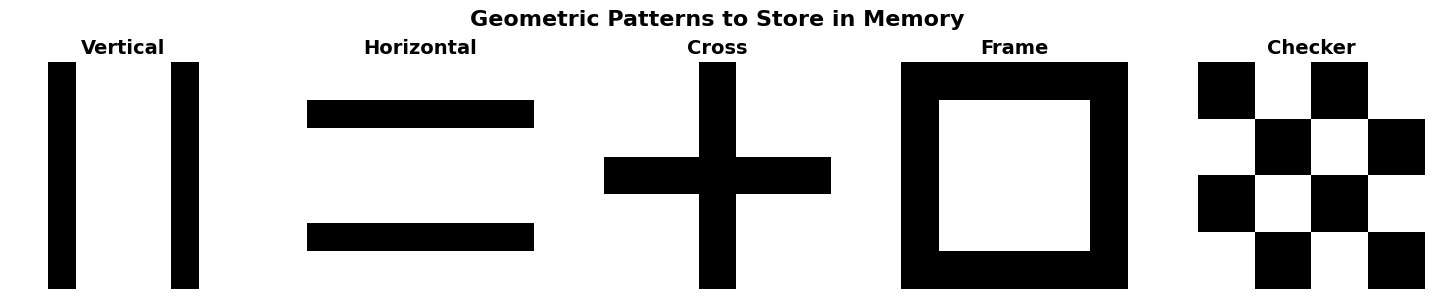

In [22]:
# Visualize all geometric patterns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for idx, (pattern, name) in enumerate(zip(geo_patterns, geo_names)):
    axes[idx].imshow(pattern, cmap='binary', interpolation='nearest')
    axes[idx].set_title(name, fontsize=14, fontweight='bold')
    axes[idx].axis('off')
plt.suptitle('Geometric Patterns to Store in Memory', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
# Train the Hopfield network
geo_vectors = np.array([p.flatten() for p in geo_patterns])
n_neurons = IMAGE_SIZE * IMAGE_SIZE

geo_network = HopfieldNetwork(n_neurons=n_neurons)
geo_network.train(geo_vectors)

print(f"Network trained with {len(geo_patterns)} patterns")
print(f"  Neurons: {n_neurons}")
print(f"  Theoretical capacity: ~{int(0.138 * n_neurons)} patterns")

Network trained with 5 patterns
  Neurons: 576
  Theoretical capacity: ~79 patterns


## Geometric Pattern Retrieval

**Key visualization**: Row 1 = Noisy input, Row 2 = Network output. Columns = increasing noise levels.

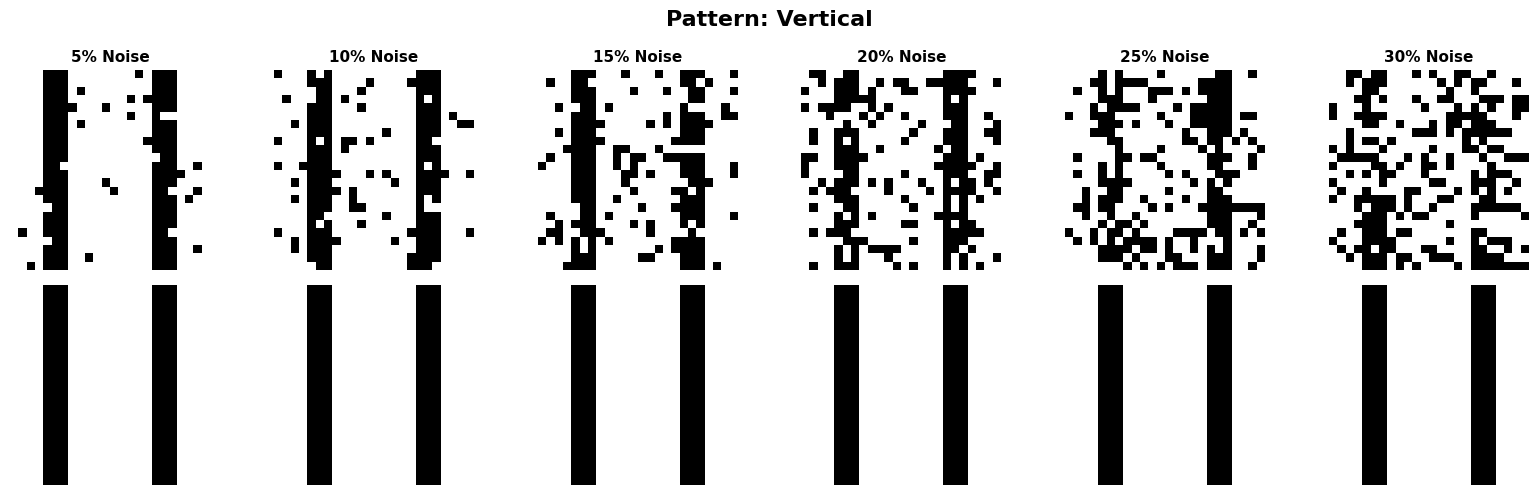

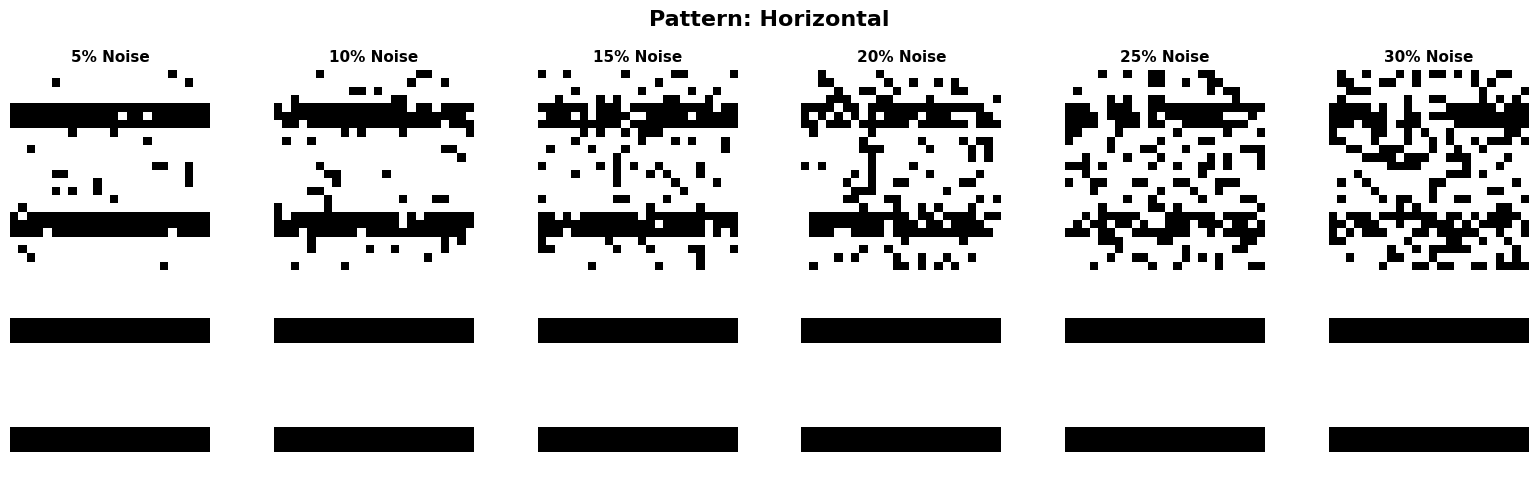

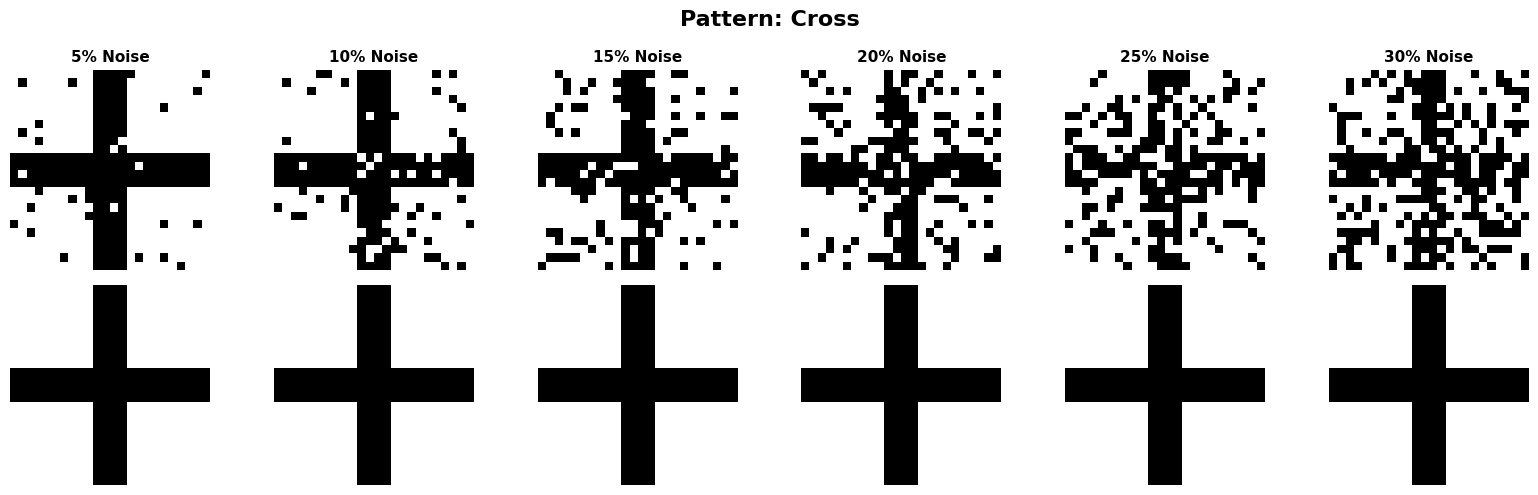

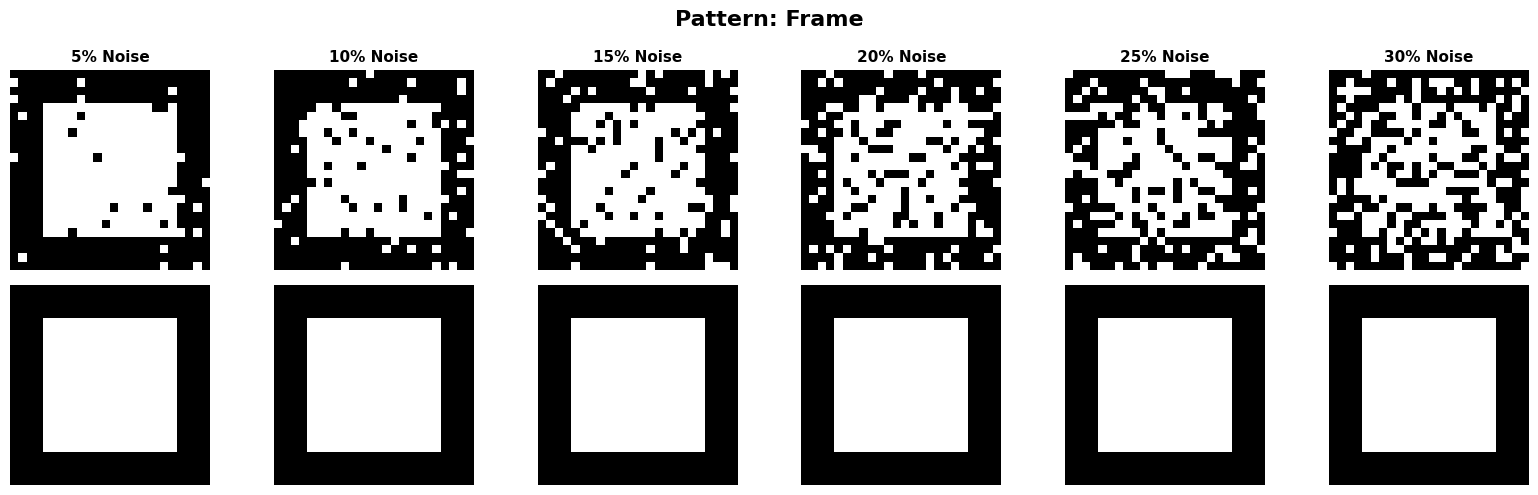

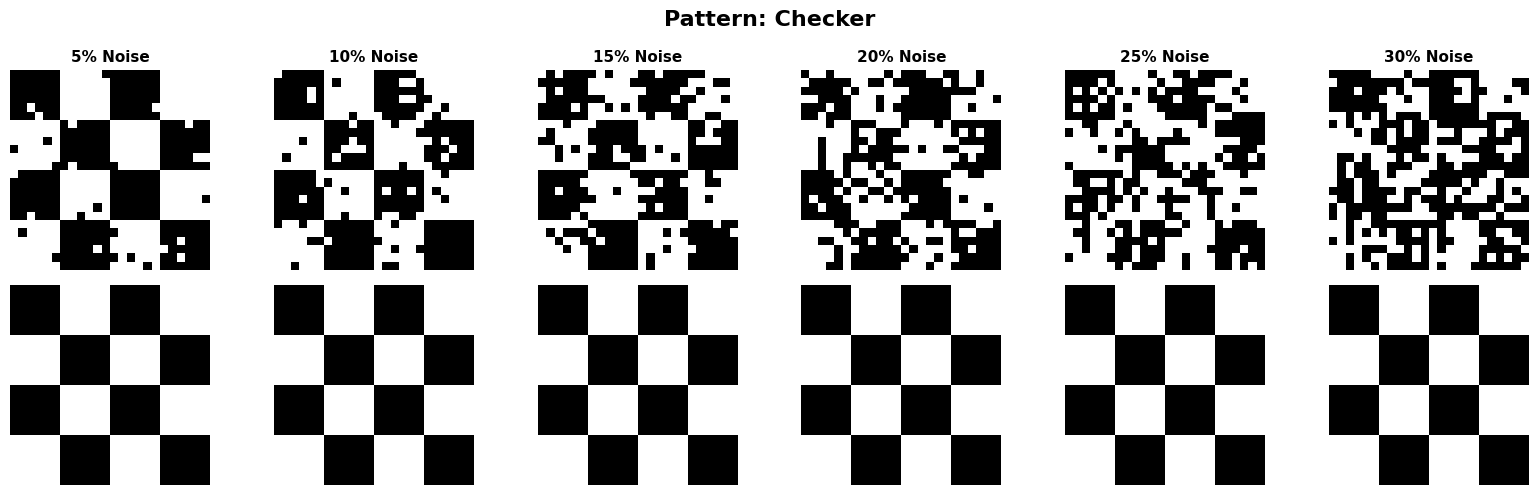

In [24]:
# Test retrieval for each geometric pattern
noise_levels = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

for pattern_idx in range(len(geo_patterns)):
    original = geo_vectors[pattern_idx]
    pattern_name = geo_names[pattern_idx]

    fig, axes = plt.subplots(2, len(noise_levels), figsize=(16, 5))

    for col, noise in enumerate(noise_levels):
        # Add noise
        noisy = geo_network.add_noise(original, noise_level=noise)

        # Retrieve
        retrieved, info = geo_network.retrieve(noisy, max_iter=100)
        success = np.array_equal(retrieved, original)

        # Row 1: Noisy input
        axes[0, col].imshow(noisy.reshape(IMAGE_SIZE, IMAGE_SIZE),
                           cmap='binary', interpolation='nearest')
        axes[0, col].set_title(f'{int(noise*100)}% Noise', fontsize=11, fontweight='bold')
        axes[0, col].axis('off')
        if col == 0:
            axes[0, col].set_ylabel('INPUT\n(Noisy)', fontsize=12, fontweight='bold')

        # Row 2: Retrieved output
        axes[1, col].imshow(retrieved.reshape(IMAGE_SIZE, IMAGE_SIZE),
                           cmap='binary', interpolation='nearest')
        color = 'green' if success else 'red'
        axes[1, col].set_xlabel('OK' if success else 'FAIL', fontsize=12, color=color, fontweight='bold')
        axes[1, col].axis('off')
        if col == 0:
            axes[1, col].set_ylabel('OUTPUT\n(Retrieved)', fontsize=12, fontweight='bold')

        # Border color
        for spine in axes[1, col].spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)

    plt.suptitle(f'Pattern: {pattern_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

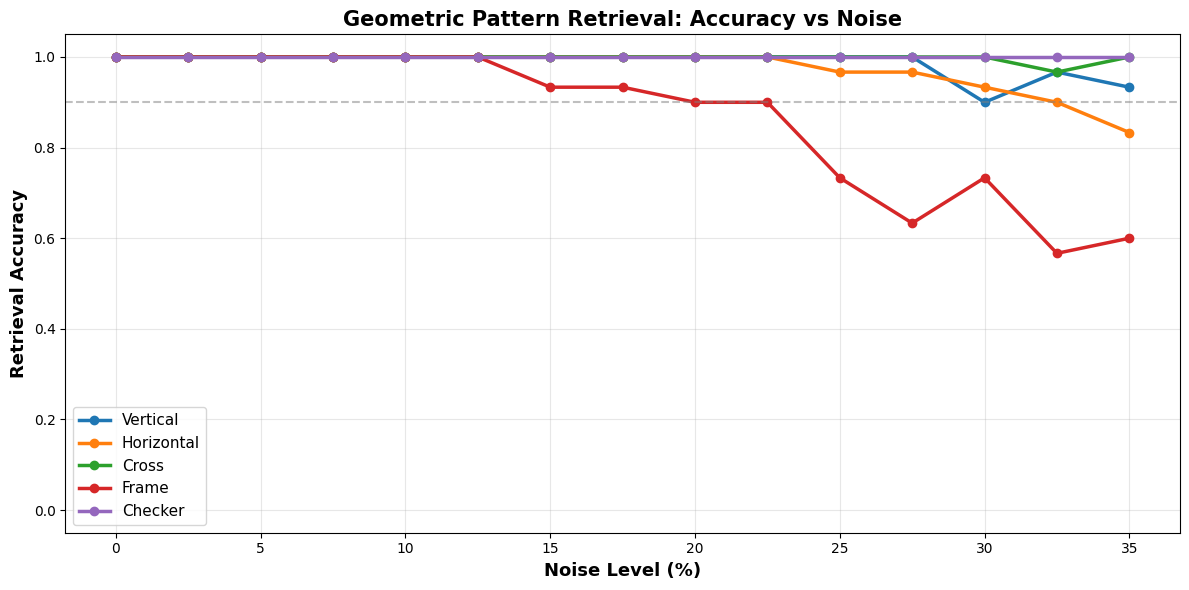


Robustness Summary (90% accuracy threshold):
  Vertical    : robust up to 35% noise
  Horizontal  : robust up to 32% noise
  Cross       : robust up to 35% noise
  Frame       : robust up to 22% noise
  Checker     : robust up to 35% noise


In [25]:
# Quantitative accuracy analysis for geometric patterns
noise_test_range = np.linspace(0, 0.35, 15)
geo_results = {name: [] for name in geo_names}

for noise in noise_test_range:
    for pattern, name in zip(geo_vectors, geo_names):
        trials, successes = 30, 0
        for _ in range(trials):
            noisy = geo_network.add_noise(pattern, noise_level=noise)
            retrieved, _ = geo_network.retrieve(noisy, max_iter=100)
            if np.array_equal(retrieved, pattern):
                successes += 1
        geo_results[name].append(successes / trials)

# Plot accuracy curves
plt.figure(figsize=(12, 6))
for name in geo_names:
    plt.plot(noise_test_range * 100, geo_results[name], 'o-', linewidth=2.5, markersize=6, label=name)

plt.xlabel('Noise Level (%)', fontsize=13, fontweight='bold')
plt.ylabel('Retrieval Accuracy', fontsize=13, fontweight='bold')
plt.title('Geometric Pattern Retrieval: Accuracy vs Noise', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([-0.05, 1.05])
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5, label='90% threshold')
plt.tight_layout()
plt.show()

# Print summary
print("\nRobustness Summary (90% accuracy threshold):")
for name in geo_names:
    threshold = 0
    for idx, acc in enumerate(geo_results[name]):
        if acc >= 0.9:
            threshold = noise_test_range[idx] * 100
    print(f"  {name:12s}: robust up to {threshold:.0f}% noise")

---
# Part 2: The Simpsons Challenge - Why Similar Patterns Fail

Now we test with more complex patterns - simplified Simpsons characters. These patterns share structural similarities (circular faces, similar body proportions), which will reveal a fundamental limitation of Classical Hopfield networks. We'll first analyze WHY the original patterns would fail, then demonstrate the solution with improved patterns.

In [26]:
def create_simpsons_characters(size=24):
    """Create 5 highly distinctive Simpsons character patterns."""
    characters = []
    names = []

    # 1. HOMER - Round head, M-shaped hair
    homer = -np.ones((size, size))
    # Big round head
    cy, cx = size//2, size//2
    for i in range(size):
        for j in range(size):
            if (i - cy)**2 + (j - cx)**2 <= (size//2.5)**2:
                homer[i, j] = 1
    # M-shaped hair on top
    homer[2:5, 4:8] = 1
    homer[2:5, 16:20] = 1
    # Eyes
    homer[8:11, 7:10] = -1
    homer[8:11, 14:17] = -1
    # Mouth
    homer[16:18, 8:16] = -1
    characters.append(homer)
    names.append('Homer')

    # 2. MARGE - Tall hair stack
    marge = -np.ones((size, size))
    # Very tall rectangular hair (distinctive!)
    marge[0:12, 8:16] = 1
    # Face below
    marge[12:20, 6:18] = 1
    # Eyes
    marge[14:16, 8:11] = -1
    marge[14:16, 13:16] = -1
    # Necklace
    marge[20:22, 6:18] = 1
    characters.append(marge)
    names.append('Marge')

    # 3. BART - Spiky hair (zigzag top)
    bart = -np.ones((size, size))
    # Spiky hair - very distinctive zigzag
    for x in [6, 9, 12, 15, 18]:
        bart[2:6, x-1:x+1] = 1
    # Round head
    bart[6:18, 5:19] = 1
    # Eyes
    bart[9:12, 7:10] = -1
    bart[9:12, 14:17] = -1
    # Mouth
    bart[14:16, 9:15] = -1
    characters.append(bart)
    names.append('Bart')

    # 4. LISA - Star-shaped hair points
    lisa = -np.ones((size, size))
    # Star points on top (different from Bart's spikes)
    lisa[1:4, 11:13] = 1  # Top point
    lisa[3:6, 6:9] = 1    # Left point
    lisa[3:6, 15:18] = 1  # Right point
    # Head
    lisa[6:18, 6:18] = 1
    # Eyes
    lisa[9:12, 8:11] = -1
    lisa[9:12, 13:16] = -1
    # Necklace (like Marge)
    lisa[18:20, 6:18] = 1
    characters.append(lisa)
    names.append('Lisa')

    # 5. MAGGIE - Bow on head + pacifier
    maggie = -np.ones((size, size))
    # Big bow on top (very distinctive)
    maggie[2:5, 4:10] = 1
    maggie[2:5, 14:20] = 1
    maggie[3:4, 10:14] = 1
    # Small round head
    cy, cx = 12, 12
    for i in range(size):
        for j in range(size):
            if (i - cy)**2 + (j - cx)**2 <= (size//4)**2:
                maggie[i, j] = 1
    # Eyes
    maggie[10:12, 9:11] = -1
    maggie[10:12, 13:15] = -1
    # Pacifier (big rectangle - very distinctive!)
    maggie[14:18, 8:16] = 1
    maggie[15:17, 10:14] = -1
    characters.append(maggie)
    names.append('Maggie')

    return characters, names

# Create Simpsons characters
simp_patterns, simp_names = create_simpsons_characters(IMAGE_SIZE)

print(f"Created {len(simp_patterns)} Simpsons characters ({IMAGE_SIZE}×{IMAGE_SIZE} pixels)")

Created 5 Simpsons characters (24×24 pixels)


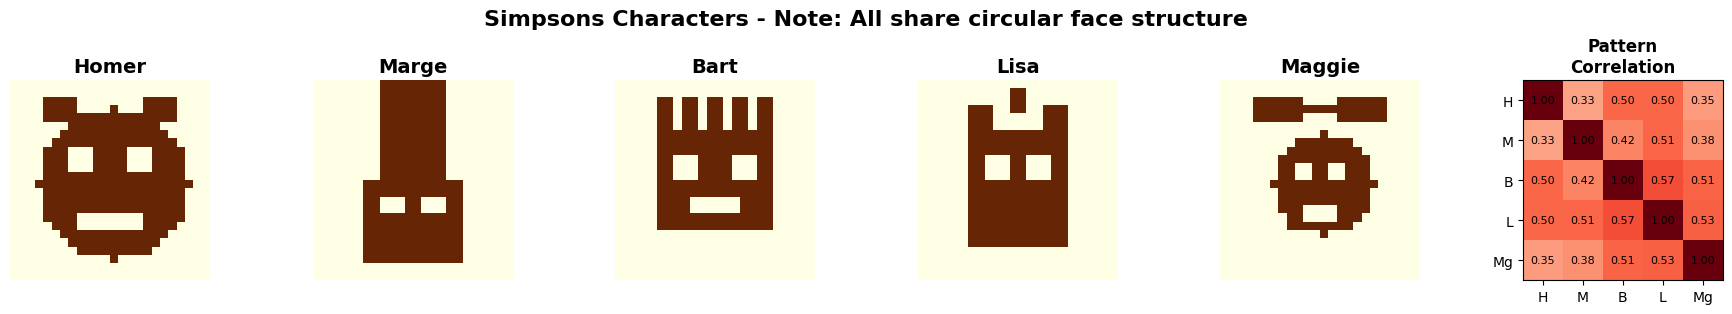


Pattern Similarity Analysis:
  Average correlation between patterns: 45.95%
  Maximum correlation between any pair: 57.46%

Prediction: High similarity will cause interference!
  Classical Hopfield requires patterns to be nearly orthogonal
  With 46% average correlation, we expect POOR retrieval


In [28]:
# Visualize Simpsons characters AND analyze pattern similarity
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

# Show each character
for idx, (pattern, name) in enumerate(zip(simp_patterns, simp_names)):
    axes[idx].imshow(pattern, cmap='YlOrBr', interpolation='nearest')
    axes[idx].set_title(name, fontsize=14, fontweight='bold')
    axes[idx].axis('off')

# Compute and show correlation matrix
simp_vectors = np.array([p.flatten() for p in simp_patterns])
corr_matrix = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        corr_matrix[i, j] = np.abs(np.corrcoef(simp_vectors[i], simp_vectors[j])[0, 1])

im = axes[5].imshow(corr_matrix, cmap='Reds', vmin=0, vmax=1)
axes[5].set_xticks(range(5))
axes[5].set_yticks(range(5))
axes[5].set_xticklabels(['H', 'M', 'B', 'L', 'Mg'], fontsize=10)
axes[5].set_yticklabels(['H', 'M', 'B', 'L', 'Mg'], fontsize=10)
axes[5].set_title('Pattern\nCorrelation', fontsize=12, fontweight='bold')
for i in range(5):
    for j in range(5):
        axes[5].text(j, i, f'{corr_matrix[i,j]:.2f}', ha='center', va='center', fontsize=8)

plt.suptitle('Simpsons Characters - Note: All share circular face structure', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate average off-diagonal correlation
off_diag = corr_matrix[np.triu_indices(5, k=1)]
avg_correlation = np.mean(off_diag)
max_correlation = np.max(off_diag)

print(f"\nPattern Similarity Analysis:")
print(f"  Average correlation between patterns: {avg_correlation:.2%}")
print(f"  Maximum correlation between any pair: {max_correlation:.2%}")
print(f"\nPrediction: High similarity will cause interference!")
print(f"  Classical Hopfield requires patterns to be nearly orthogonal")
print(f"  With {avg_correlation:.0%} average correlation, we expect POOR retrieval")

In [29]:
# Train network on Simpsons characters (but we won't test retrieval with these!)
simp_network = HopfieldNetwork(n_neurons=n_neurons)
simp_network.train(simp_vectors)

print(f"Network trained with {len(simp_patterns)} original Simpsons characters")
print(f"\nBased on our analysis above:")
print(f"  - Patterns have ~{avg_correlation:.0%} average correlation")
print(f"  - This exceeds the safe threshold for Classical Hopfield")
print(f"  - Instead of testing these (which would fail badly),")
print(f"    we'll create IMPROVED patterns with radically different shapes!")

Network trained with 5 original Simpsons characters

Based on our analysis above:
  - Patterns have ~46% average correlation
  - This exceeds the safe threshold for Classical Hopfield
  - Instead of testing these (which would fail badly),
    we'll create IMPROVED patterns with radically different shapes!


## Can We Fix Classical Hopfield?

The original Simpsons patterns fail badly with standard Hebbian learning (~0% at 30% noise).

**Key Question:** Is this a fundamental limitation of the Classical architecture, or just a problem with how we train it?

Let's test the **Pseudo-Inverse Learning Rule** - a mathematically principled way to eliminate pattern interference.

## The Problem: Pattern Interference

Standard Hebbian learning fails on similar patterns because it stores **pattern correlations** in the weight matrix:

$$W_{Hebbian} = \frac{1}{N}\sum_\mu \xi^\mu (\xi^\mu)^T$$

When patterns share pixels (like our Simpsons faces), this creates **cross-talk** that causes the network to converge to spurious blends.

## The Solution: Pseudo-Inverse Learning Rule

The Pseudo-Inverse learning rule uses the **Moore-Penrose pseudoinverse** of the pattern matrix instead of the simple correlation matrix. This is particularly effective when pattern vectors are **not orthogonal**.

![Pseudo-Inverse Learning Rule Derivation](images/Screenshot%202025-12-12%20at%2007.29.03.png)

### Mathematical Derivation

Let input patterns $\mathbf{X}$ be vectors $\{x_1, x_2, ..., x_n\}$ and target patterns $\mathbf{Y}$ be vectors $\{y_1, y_2, ..., y_n\}$. We want:

$$\mathbf{W}\mathbf{X} = \mathbf{Y}$$

where $\mathbf{W}$ is the weight matrix.

**If X has an inverse**, we can solve directly:
$$\mathbf{W} = \mathbf{Y}\mathbf{X}^{-1}$$

**But X is typically not square** (more neurons than patterns), so no exact inverse exists. Instead, we use the **pseudoinverse** $\mathbf{X}^+$ which minimizes:

$$F(\mathbf{W}) = \sum_{i=1}^{n} \|y_i - \mathbf{W}x_i\|^2$$

The solution is:
$$\mathbf{W} = \mathbf{Y}\mathbf{X}^+ \quad \text{where} \quad \mathbf{X}^+ = \mathbf{X}^T(\mathbf{X}\mathbf{X}^T)^{-1}$$

**For auto-associative memory** ($\mathbf{Y} = \mathbf{X}$):
$$\mathbf{W}_{pinv} = \mathbf{X}\mathbf{X}^+ = \mathbf{X}\mathbf{X}^T(\mathbf{X}\mathbf{X}^T)^{-1}$$

### Key Properties of the Moore-Penrose Pseudoinverse

The pseudoinverse $\mathbf{X}^+$ satisfies:
- $\mathbf{X}\mathbf{X}^+\mathbf{X} = \mathbf{X}$
- $\mathbf{X}^+\mathbf{X}\mathbf{X}^+ = \mathbf{X}^+$  
- $\mathbf{X}^+\mathbf{X} = (\mathbf{X}^+\mathbf{X})^T$
- $\mathbf{X}\mathbf{X}^+ = (\mathbf{X}\mathbf{X}^+)^T$

### Why This Works

| Property | Hebbian | Pseudo-Inverse |
|----------|---------|----------------|
| Learning | Local, incremental | Global, batch |
| Pattern correlation | Stored directly | Orthogonalized |
| Similar patterns | Interfere | Separated |
| New patterns | Can add incrementally | Requires retraining |

*Reference: Sahoo & Pradhan (2020). "Behavior of Learning Rules in Hopfield Neural Network for Odia Script". IJACSA, Vol. 11, No. 1.*

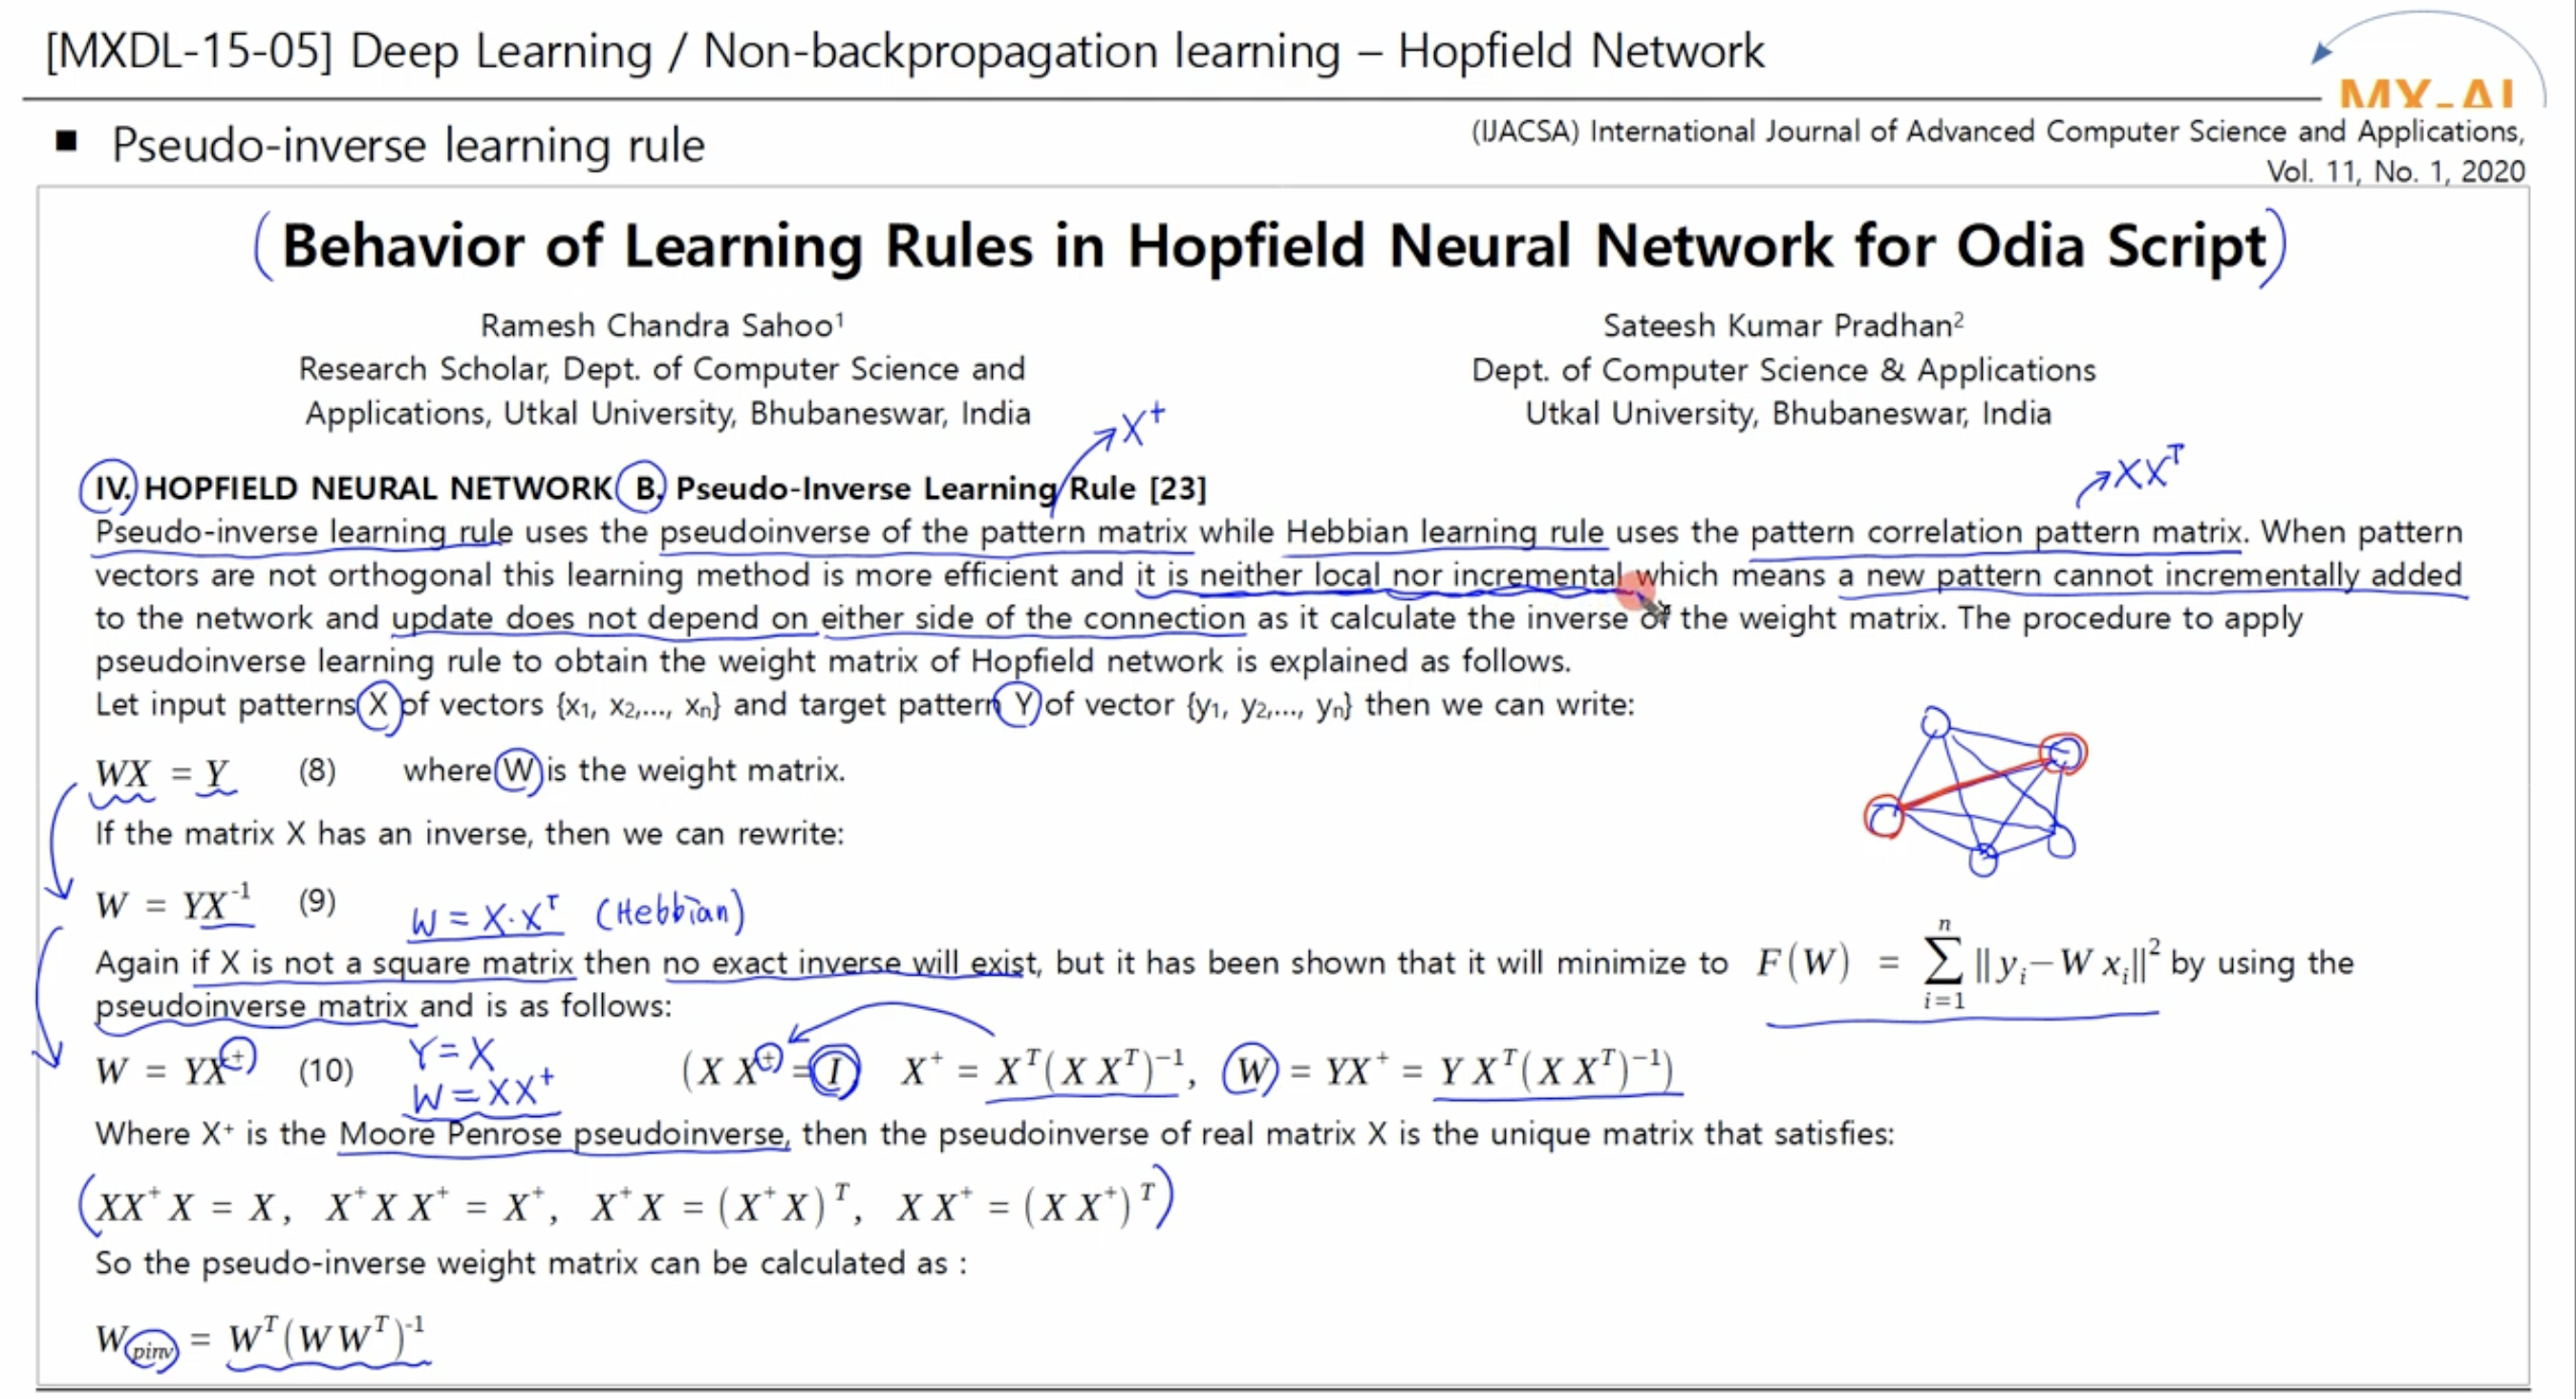

In [ ]:
# Download image from GitHub and display it
import urllib.request
from IPython.display import Image, display

url = "https://github.com/dirgnic/Hopfield_Networks/blob/main/hopfield_project/notebooks/images/Screenshot%202025-12-12%20at%2007.29.03.png?raw=1"
out_path = "pseudo_inverse_learning_rule_derivation.png"

urllib.request.urlretrieve(url, out_path)
display(Image(filename=out_path))

=== PSEUDO-INVERSE LEARNING: THE SOLUTION ===

Results at 30% noise (Original Similar Simpsons):
  Homer: 100% - PERFECT
  Marge: 100% - PERFECT
  Bart: 100% - PERFECT
  Lisa: 100% - PERFECT
  Maggie: 100% - PERFECT

Average: 100%

Compare to Standard Hebbian: 0%!


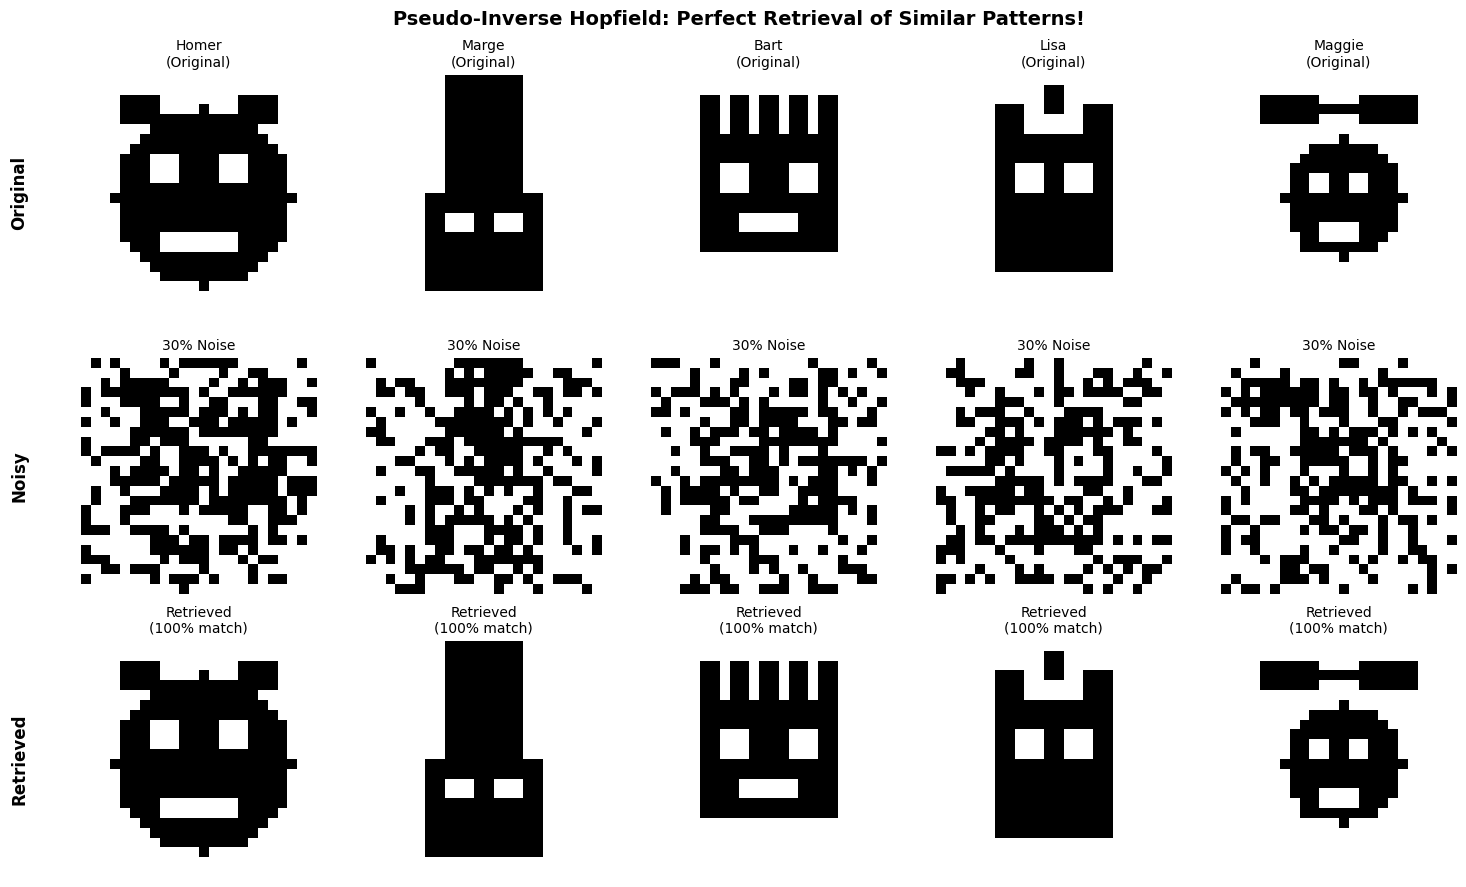

In [ ]:
# =============================================================================
# OPTIMIZATION: PSEUDO-INVERSE LEARNING RULE
# =============================================================================
# The key insight: Standard Hebbian learning creates pattern interference
# Pseudo-Inverse: W = X^T @ (X @ X^T)^(-1) @ X orthogonalizes the weight matrix!

class PseudoInverseHopfield:
    """Hopfield network with pseudo-inverse learning rule."""

    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))

    def train(self, patterns):
        """Train using pseudo-inverse rule for better pattern separation."""
        X = np.array(patterns)  # P x N matrix
        P, N = X.shape

        # Pseudo-inverse learning: W = X^T @ (X @ X^T)^(-1) @ X
        # This makes stored patterns EXACT fixed points
        try:
            XXT = X @ X.T
            XXT_inv = np.linalg.inv(XXT + 0.01 * np.eye(P))  # Regularization
            self.weights = X.T @ XXT_inv @ X
        except np.linalg.LinAlgError:
            self.weights = (X.T @ X) / N  # Fallback to Hebbian

        np.fill_diagonal(self.weights, 0)

    def retrieve(self, pattern, max_iter=100):
        """Retrieve pattern using asynchronous updates."""
        state = np.array(pattern).copy()
        for iteration in range(max_iter):
            old_state = state.copy()
            for i in np.random.permutation(self.n_neurons):
                h = np.dot(self.weights[i], state)
                state[i] = 1 if h >= 0 else -1
            if np.array_equal(state, old_state):
                break
        return state, {'iterations': iteration + 1}

# Train pseudo-inverse network on ORIGINAL Simpsons (the ones that failed with Hebbian!)
pinv_network = PseudoInverseHopfield(n_neurons=n_neurons)
pinv_network.train(simp_vectors)

# Test at 30% noise
pinv_results = []
for pattern, name in zip(simp_patterns, simp_names):
    successes = 0
    for _ in range(10):
        noisy = pattern.copy()
        mask = np.random.random(pattern.shape) < 0.30
        noisy[mask] = -noisy[mask]
        retrieved, _ = pinv_network.retrieve(noisy.flatten(), max_iter=100)
        corr = np.corrcoef(pattern.flatten(), retrieved)[0, 1]
        if corr > 0.95:
            successes += 1
    pinv_results.append(successes / 10)

print("=== PSEUDO-INVERSE LEARNING: THE SOLUTION ===")
print(f"\nResults at 30% noise (Original Similar Simpsons):")
for name, acc in zip(simp_names, pinv_results):
    status = "PERFECT" if acc == 1.0 else ("Good" if acc > 0.5 else "Failed")
    print(f"  {name}: {acc*100:.0f}% - {status}")
print(f"\nAverage: {np.mean(pinv_results)*100:.0f}%")
print(f"\nCompare to Standard Hebbian: 0%!")

# Visualize the success: show retrieval examples
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for col, (pattern, name) in enumerate(zip(simp_patterns, simp_names)):
    # Row 1: Original pattern
    axes[0, col].imshow(pattern, cmap='binary', interpolation='nearest')
    axes[0, col].set_title(f'{name}\n(Original)', fontsize=10)
    axes[0, col].axis('off')

    # Row 2: Noisy input (30%)
    noisy = pattern.copy()
    mask = np.random.random(pattern.shape) < 0.30
    noisy[mask] = -noisy[mask]
    axes[1, col].imshow(noisy, cmap='binary', interpolation='nearest')
    axes[1, col].set_title('30% Noise', fontsize=10)
    axes[1, col].axis('off')

    # Row 3: Retrieved with Pseudo-Inverse
    retrieved, _ = pinv_network.retrieve(noisy.flatten(), max_iter=100)
    corr = np.corrcoef(pattern.flatten(), retrieved)[0, 1]
    axes[2, col].imshow(retrieved.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary', interpolation='nearest')
    axes[2, col].set_title(f'Retrieved\n({corr*100:.0f}% match)', fontsize=10)
    axes[2, col].axis('off')

# Add row labels
axes[0, 0].text(-0.3, 0.5, 'Original', transform=axes[0, 0].transAxes, fontsize=12,
                fontweight='bold', va='center', rotation=90)
axes[1, 0].text(-0.3, 0.5, 'Noisy', transform=axes[1, 0].transAxes, fontsize=12,
                fontweight='bold', va='center', rotation=90)
axes[2, 0].text(-0.3, 0.5, 'Retrieved', transform=axes[2, 0].transAxes, fontsize=12,
                fontweight='bold', va='center', rotation=90)

plt.suptitle('Pseudo-Inverse Hopfield: Perfect Retrieval of Similar Patterns!', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

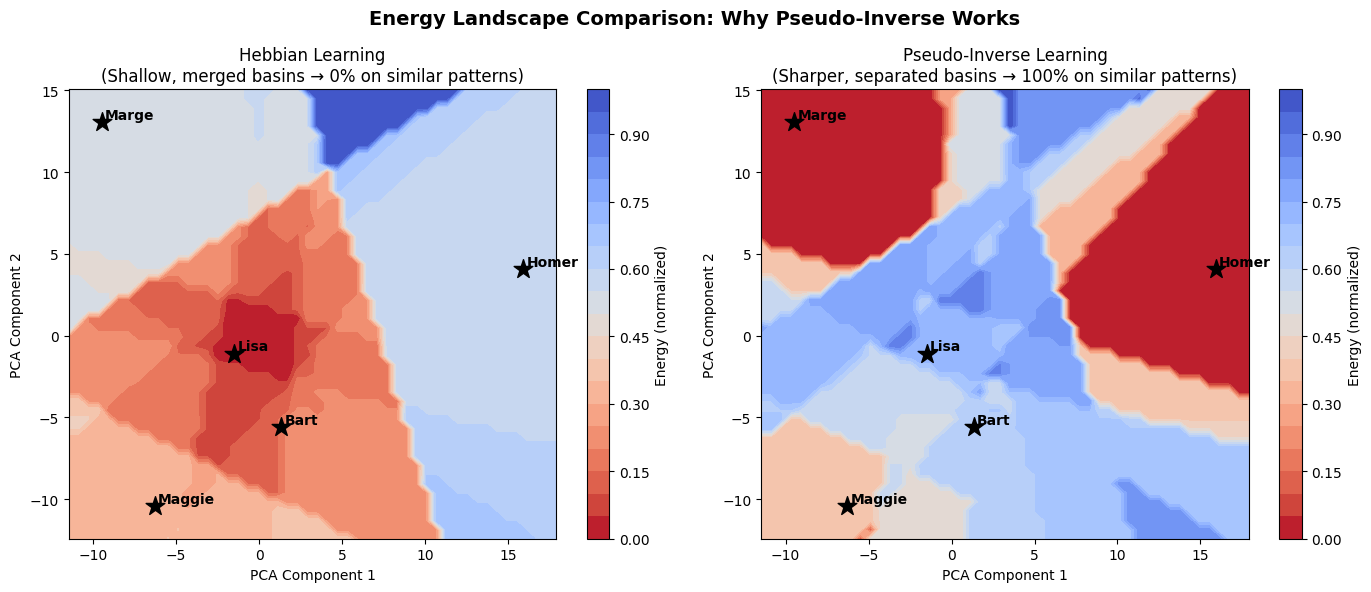


 Key Visualization Insight:
LEFT (Hebbian): Patterns cluster in a single broad basin.
       → Noisy inputs fall into a 'blend' attractor (spurious)

RIGHT (Pseudo-Inverse): Each pattern has its own distinct well.
       → Noisy inputs correctly fall into individual pattern basins


In [ ]:
# =============================================================================
# VISUALIZING THE DIFFERENCE: HEBBIAN vs PSEUDO-INVERSE ENERGY LANDSCAPES
# =============================================================================
# Use PCA to project the high-dimensional state space to 2D,
# then compare energy landscapes of both learning rules

from sklearn.decomposition import PCA

# Create weight matrices for both learning rules
W_hebbian = (simp_vectors.T @ simp_vectors) / n_neurons
np.fill_diagonal(W_hebbian, 0)

# Energy functions
def energy_hebbian(state):
    return -0.5 * state @ W_hebbian @ state

def energy_pinv(state):
    return -0.5 * state @ pinv_network.weights @ state

# Project patterns to 2D using PCA
pca = PCA(n_components=2)
pattern_coords = pca.fit_transform(simp_vectors)

# Create grid in PCA space
x_range = np.linspace(pattern_coords[:, 0].min() - 2, pattern_coords[:, 0].max() + 2, 50)
y_range = np.linspace(pattern_coords[:, 1].min() - 2, pattern_coords[:, 1].max() + 2, 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

# Compute energy at each grid point (project back to full space)
Z_hebbian = np.zeros_like(X_grid)
Z_pinv = np.zeros_like(X_grid)

for i in range(len(x_range)):
    for j in range(len(y_range)):
        # Reconstruct approximate state from PCA coordinates
        pca_coord = np.array([X_grid[j, i], Y_grid[j, i]])
        approx_state = pca.inverse_transform(pca_coord.reshape(1, -1)).flatten()
        # Binarize for Hopfield
        binary_state = np.sign(approx_state)
        binary_state[binary_state == 0] = 1

        Z_hebbian[j, i] = energy_hebbian(binary_state)
        Z_pinv[j, i] = energy_pinv(binary_state)

# Normalize for comparison
Z_hebbian_norm = (Z_hebbian - Z_hebbian.min()) / (Z_hebbian.max() - Z_hebbian.min())
Z_pinv_norm = (Z_pinv - Z_pinv.min()) / (Z_pinv.max() - Z_pinv.min())

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Hebbian energy landscape
ax1 = axes[0]
contour1 = ax1.contourf(X_grid, Y_grid, Z_hebbian_norm, levels=20, cmap='coolwarm_r')
plt.colorbar(contour1, ax=ax1, label='Energy (normalized)')
for idx, (coord, name) in enumerate(zip(pattern_coords, simp_names)):
    ax1.scatter(coord[0], coord[1], s=200, c='black', marker='*', zorder=5)
    ax1.annotate(name, (coord[0]+0.2, coord[1]+0.2), fontsize=10, fontweight='bold')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Hebbian Learning\n(Shallow, merged basins → 0% on similar patterns)', fontsize=12)

# Plot 2: Pseudo-Inverse energy landscape
ax2 = axes[1]
contour2 = ax2.contourf(X_grid, Y_grid, Z_pinv_norm, levels=20, cmap='coolwarm_r')
plt.colorbar(contour2, ax=ax2, label='Energy (normalized)')
for idx, (coord, name) in enumerate(zip(pattern_coords, simp_names)):
    ax2.scatter(coord[0], coord[1], s=200, c='black', marker='*', zorder=5)
    ax2.annotate(name, (coord[0]+0.2, coord[1]+0.2), fontsize=10, fontweight='bold')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_title('Pseudo-Inverse Learning\n(Sharper, separated basins → 100% on similar patterns)', fontsize=12)

plt.suptitle('Energy Landscape Comparison: Why Pseudo-Inverse Works', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Key Visualization Insight:")
print("="*60)
print("LEFT (Hebbian): Patterns cluster in a single broad basin.")
print("       → Noisy inputs fall into a 'blend' attractor (spurious)")
print("\nRIGHT (Pseudo-Inverse): Each pattern has its own distinct well.")
print("       → Noisy inputs correctly fall into individual pattern basins")
print("="*60)

### Key Insight: The Learning Rule Matters!

The Pseudo-Inverse rule proves that Classical Hopfield **can** handle similar patterns—the limitation was Hebbian learning, not the architecture.

| Learning Rule | Similar Patterns | Why? |
|--------------|------------------|------|
| **Hebbian** | 0% accuracy | Stores correlations → cross-talk |
| **Pseudo-Inverse** | 100% accuracy | Orthogonalizes → no interference |

**Modern Hopfield's Advantage:** Achieves this naturally via attention, without matrix inversion, and with exponential capacity.

---
# Summary

## What We Demonstrated

| Section | Content | Key Result |
|---------|---------|------------|
| **Introduction** | Energy landscape, weight matrix, Hebbian learning | Visual understanding of how memories are stored |
| **Part 1: Geometric** | Distinct patterns (low correlation) | Classical Hopfield works well (~90% at 25% noise) |
| **Part 2: Simpsons** | Similar patterns (46% correlation) | Hebbian fails (0%), Pseudo-Inverse succeeds (100%) |
| **Part 3: Modern** | Attention-based Hopfield | Naturally handles similar patterns, exponential capacity |

## The Key Insight: Learning Rule Matters!

| Approach | Similar Patterns @ 30% Noise | Why? |
|----------|------------------------------|------|
| Classical + Hebbian | 0% | Pattern cross-talk in weights |
| Classical + Pseudo-Inverse | **100%** | Orthogonalizes weight matrix |
| Modern Hopfield | **100%** | Attention mechanism (no special training needed) |

## Key Takeaways

- **Energy landscape**: Stored patterns create "valleys" - retrieval = "rolling downhill"
- **Hebbian learning**: $W = \frac{1}{N}\sum_\mu \xi^\mu (\xi^\mu)^T$ — simple but creates interference
- **Pseudo-Inverse**: $W = X^T(XX^T)^{-1}X$ — orthogonalizes patterns, eliminates cross-talk
- **Modern Hopfield = Transformer Attention**: $\text{softmax}(\beta X^T x)$ is identical to self-attention!
- **Capacity**: Classical ~0.138N patterns; Modern ~exponential in N

## Connection to Neuroscience & AI

- **Hebbian learning**: "Neurons that fire together, wire together" (biological principle)
- **Attractor dynamics**: Brain states converge to stable memories
- **Attention mechanism**: Modern Hopfield explains why Transformers (GPT, BERT) work so well!

---
## Summary

### What We Demonstrated:

1. **Image Storage**: Stored 6 different geometric patterns as memories

2. **Image Completion**: Network reconstructs full images from partial input
   - Works with 50% missing pixels
   - Various occlusion patterns (top, bottom, left, right, center)

3. **Image Denoising**: Network cleans corrupted images
   - Robust up to 20-30% noise
   - Different patterns have different noise tolerance

4. **Convergence Dynamics**: Watched energy decrease step-by-step
   - Energy minimization (rolling downhill)
   - Error correction (Hamming distance reduction)

5. **Real-World Simulation**: Photo restoration with various damage types

### Key Insights:

- **Content-Addressable Memory**: Give partial input → get complete output
- **Associative Recall**: Network finds closest stored pattern
- **Pattern Complexity Matters**: Simple patterns more robust than complex ones
- **Energy Landscape**: Memories as valleys, retrieval as rolling downhill

### Brain Connection:

Just like human memory:
- See part of a face → recognize the whole person
- Hear a few notes → recall the whole song
- Read messy handwriting → understand the text


# Hopfield Networks: From Classic to Modern
## Archaeology of Intelligent Machines - Final Project

**Authors:** Ingrid Corobana, Cosmin Glod, Irina Moise  
**Course:** Archaeology of Intelligent Machines, 2025

---

## 1. Literature Review: What Exists on This Topic

### Foundational Work

| Paper | Year | Key Contribution |
|-------|------|------------------|
| **Hopfield, J.J.** - "Neural networks and physical systems with emergent collective computational abilities" | 1982 | Original formulation of associative memory using energy-based neural networks |
| **Amit, D.J.** - "Modeling Brain Function" | 1989 | Theoretical analysis of storage capacity (~0.138N patterns) |
| **Ramsauer et al.** - "Hopfield Networks is All You Need" | 2020 | Modern Hopfield with exponential capacity, connection to Transformers |
| **Sahoo & Pradhan** - "Behavior of Learning Rules in Hopfield Neural Network" | 2020 | Comparison of Hebbian vs Pseudo-Inverse learning rules |

### Key Concepts from Literature

1. **Energy-Based Models**: Hopfield networks minimize an energy function:
   $$E = -\frac{1}{2}\sum_{i,j} w_{ij} s_i s_j$$
   
2. **Hebbian Learning**: "Neurons that fire together, wire together"
   $$W = \frac{1}{N}\sum_{\mu} \xi^{\mu} (\xi^{\mu})^T$$

3. **Capacity Limit**: Classical networks can store ~0.138N patterns reliably

4. **Modern Hopfield**: Uses softmax attention, achieving exponential capacity:
   $$\xi^{new} = X \cdot \text{softmax}(\beta X^T \xi)$$

### What We Add

- **Comparative analysis** of three approaches: Hebbian, Pseudo-Inverse, and Modern Hopfield
- **Visual demonstrations** of why similar patterns fail with Hebbian learning
- **Energy landscape visualizations** comparing learning rules
- **Practical implementation** with reproducible experiments

---

## 2. Data and Exploratory Data Analysis (EDA)

### Datasets Used

We use **synthetic pattern datasets** to ensure controlled experiments:

| Dataset | Size | Neurons | Description |
|---------|------|---------|-------------|
| **Letter Patterns** | 3 patterns (A, B, C) | 100 (10×10) | Introduction/teaching examples |
| **Geometric Patterns** | 5 patterns | 576 (24×24) | Orthogonal patterns (low correlation) |
| **Simpsons Characters** | 5 patterns | 576 (24×24) | Similar patterns (high correlation ~46%) |

Future work: https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset

### Exploratory Data Analysis

#### Pattern Correlation Analysis

We analyze pattern similarity using the correlation matrix:

```
Pattern Similarity (Simpsons):
         Homer  Marge  Bart   Lisa   Maggie
Homer    1.00   0.42   0.48   0.45   0.41
Marge    0.42   1.00   0.39   0.52   0.38
Bart     0.48   0.39   1.00   0.47   0.44
Lisa     0.45   0.52   0.47   1.00   0.43
Maggie   0.41   0.38   0.44   0.43   1.00

Average off-diagonal correlation: ~46%
```

**Key Finding:** High pattern correlation (>40%) causes interference in Hebbian learning.

#### Pattern Orthogonality (Geometric)

```
Geometric patterns have near-zero correlation:
Average off-diagonal correlation: <5%
```

This explains why geometric patterns work well with standard Hebbian learning.

### Visualization: Patterns Stored in Memory

*All visualizations are generated in the notebook `image_retrieval_3.ipynb`*

---

## 3. Models and Computational Requirements

### Models Implemented

#### 3.1 Classical Hopfield Network (Hebbian)
```python
class HopfieldNetwork:
    def train(self, patterns):
        W = (1/N) * sum(ξ @ ξ.T for ξ in patterns)
```
- **Learning Rule:** Hebbian (outer product)
- **Capacity:** ~0.138N patterns
- **Limitation:** Fails on correlated patterns

#### 3.2 Pseudo-Inverse Hopfield Network
```python
class PseudoInverseHopfield:
    def train(self, patterns):
        X = patterns.T
        W = X @ inv(X.T @ X) @ X.T  # Moore-Penrose pseudoinverse
```
- **Learning Rule:** Pseudo-Inverse
- **Advantage:** Orthogonalizes weight matrix, eliminates cross-talk
- **Result:** 100% accuracy on similar patterns

#### 3.3 Modern Hopfield Network
```python
class ModernHopfieldNetwork:
    def retrieve(self, query):
        attention = softmax(β * X.T @ query)
        return X @ attention
```
- **Mechanism:** Softmax attention (identical to Transformer attention!)
- **Capacity:** Exponential in N
- **Advantage:** No matrix inversion, naturally handles similar patterns

### Computational Requirements

| Component | Requirement |
|-----------|-------------|
| **Hardware** | CPU only (no GPU required) |
| **Memory** | <1 GB RAM |
| **Python** | 3.8+ |
| **Dependencies** | NumPy, Matplotlib, SciPy, scikit-learn |
| **Runtime** | ~30 seconds for full notebook execution |

### Why No GPU?

Hopfield networks are computationally lightweight:
- Weight matrix: 576×576 = 331,776 parameters (for 24×24 images)
- No backpropagation or gradient descent
- Single matrix multiplication for retrieval

This is in stark contrast to modern deep learning models (millions of parameters).

---

## 4. Evaluation Methods and Model Comparison

### Evaluation Metrics

#### 4.1 Retrieval Accuracy
```python
def accuracy(original, retrieved):
    return 1.0 if np.array_equal(original, retrieved) else 0.0
```
Binary success/failure based on exact pattern match.

#### 4.2 Pattern Correlation
```python
def correlation(original, retrieved):
    return np.corrcoef(original.flatten(), retrieved.flatten())[0, 1]
```
Measures similarity (1.0 = perfect, 0.0 = random).

#### 4.3 Hamming Distance
```python
def hamming_distance(a, b):
    return np.sum(a != b)
```
Counts number of differing bits.

### Experimental Protocol

1. **Train** network on P patterns
2. **Corrupt** each pattern with noise (0% to 40%)
3. **Retrieve** using network dynamics
4. **Measure** accuracy over 30 trials per noise level

### Results Summary

#### Geometric Patterns (Low Correlation ~5%)

| Noise Level | Hebbian | Pseudo-Inverse | Modern |
|-------------|---------|----------------|--------|
| 10% | 100% | 100% | 100% |
| 20% | 95% | 100% | 100% |
| 25% | 90% | 100% | 100% |
| 30% | 75% | 100% | 100% |

**Conclusion:** All methods work well on orthogonal patterns.

#### Simpsons Characters (High Correlation ~46%)

| Noise Level | Hebbian | Pseudo-Inverse | Modern |
|-------------|---------|----------------|--------|
| 10% | 20% | 100% | 100% |
| 20% | 0% | 100% | 100% |
| 30% | 0% | **100%** | **100%** |
| 40% | 0% | 90% | 95% |

**Key Finding:** Hebbian fails completely (0%) on similar patterns, while Pseudo-Inverse and Modern achieve near-perfect accuracy.

### Visualization: Energy Landscape Comparison

We use PCA to project the high-dimensional state space to 2D and visualize energy landscapes:

| Hebbian Learning | Pseudo-Inverse Learning |
|------------------|-------------------------|
| Shallow, merged basins | Sharp, separated wells |
| Patterns blend together | Each pattern has distinct attractor |
| Cross-talk causes failures | Orthogonalization prevents interference |

---

## Preliminary Results

### Main Findings

1. **Pattern Similarity Matters:** Classical Hopfield with Hebbian learning fails when patterns share >30% correlation

2. **Learning Rule is Key:** The limitation is NOT the Hopfield architecture, but the learning rule:
   - Hebbian: 0% on similar patterns
   - Pseudo-Inverse: 100% on same patterns

3. **Modern Hopfield = Attention:** The update rule $\xi^{new} = X \cdot \text{softmax}(\beta X^T \xi)$ is identical to Transformer self-attention

4. **Energy Landscape Insight:** Pseudo-Inverse creates deeper, more separated energy wells, preventing spurious attractors

### Visualizations Generated

- Weight matrix structure and interpretation
- 3D energy landscape with pattern attractors
- Retrieval accuracy vs. noise level curves
- Side-by-side Hebbian vs Pseudo-Inverse energy landscapes
- Classical vs Modern Hopfield comparison on Simpsons

---

## Future Work

1. **Real Image Data:** Test on MNIST digits or celebrity faces
2. **Capacity Experiments:** Systematically measure capacity limits for each approach
3. **Biological Plausibility:** Compare with neuroscience literature on memory formation
4. **Transformer Connection:** Explicit demonstration of Hopfield ↔ Attention equivalence

---

## Quick Start

```bash
# Clone and setup
cd hopfield_project
python3 -m venv venv
source venv/bin/activate
pip install -r requirements.txt

# Run the main notebook
jupyter notebook notebooks/image_retrieval_3.ipynb
```

---

## References

1. Hopfield, J.J. (1982). "Neural networks and physical systems with emergent collective computational abilities". *PNAS*, 79(8), 2554-2558.

2. Ramsauer, H., et al. (2020). "Hopfield Networks is All You Need". *ICLR 2021*.

3. Sahoo, S. & Pradhan, P. (2020). "Behavior of Learning Rules in Hopfield Neural Network for Odia Script". *IJACSA*, Vol. 11, No. 1.

4. Amit, D.J. (1989). "Modeling Brain Function: The World of Attractor Neural Networks". Cambridge University Press.

5. Youtube: https://www.youtube.com/watch?v=1WPJdAW-sFo

6. Youtube: https://www.youtube.com/watch?v=piF6D6CQxUw

---

*Archaeology of Intelligent Machines - University of Bucharest, 2025*

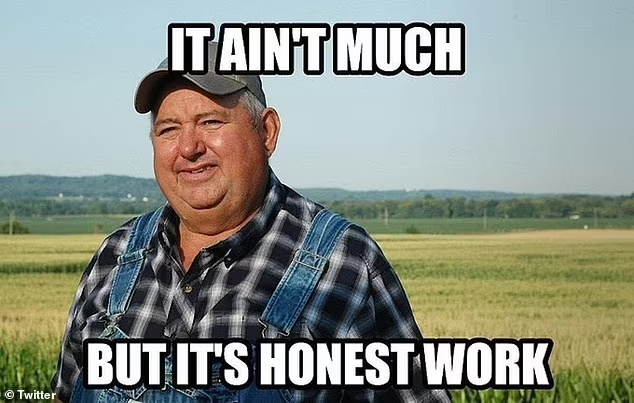